In [1]:
import re
import numpy as np
import nltk
from sklearn.metrics import accuracy_score
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
f = open("Positive.txt", "r")
positive = f.read().split("\n")
print(len(positive))

f = open("Negative.txt", "r")
negative = f.read().split("\n")
print(len(negative))

f = open("SlangAlay.txt", "r")
alay = f.read().split("\n")
list_lay = list()
for i in range(0, 15880):
    list_temp = list()
    list_temp.append(alay[i].split('\t')[0])
    list_temp.append(alay[i].split('\t')[1])
    list_lay.append(list_temp)
print(len(list_lay))

4593
10480
15880


In [4]:
panjang_alay = len(list_lay)

In [5]:
#Emoji patterns
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

In [6]:
import demoji
demoji.download_codes()

... OK (Got response in 0.89 seconds)
Writing emoji data to C:\Users\ASUS\.demoji\codes.json ...
... OK


In [7]:
# !pip install demoji

In [7]:
top1_29desAnalisis = []
top1_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 1
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(114):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus +=1
            continue        
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")
        
        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
               
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        print("pos : " + str(count_pos) + " neg : " + str(count_neg))
        
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top1_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top1_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top1_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top1_29desAnalisis.append(tweet_bersih)
    print("dihapus : " + str(dihapus))
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 

sebelum : bismillah wish me luck pengen banget makasih ga nya kak making the world bright
ubah : 3
sesudah : bismillah wish me luck ingin banget terima kasih tidak nya kak making the world bright
pos : 4 neg : 1
sebelum : making the world bright thefirststep treasureeffect treasure
ubah : 0
sesudah : making the world bright thefirststep treasureeffect treasure
pos : 0 neg : 0
sebelum : done wish me luck makasih buat giveaway nya semoga rezekinya lancar dan sehat selalu
ubah : 1
sesudah : done wish me luck terima kasih buat giveaway nya semoga rezekinya lancar dan sehat selalu
pos : 6 neg : 2
sebelum : treasure ya gini nih yg pel lor ky gw susah emang susah bangun2 dah trending aja my treasure making the worl
ubah : 11
sesudah : treasure iya begini ini yang pel lor seperti saya susah memang susah bangun2 sudah mengetren saja my treasure making the worl
pos : 2 neg : 9
sebelum : esky bntr deh kek nya gue pernah baca tpi i forget making the world bright thefirststep treasureeffect
ubah : 

sesudah : bismillah bisa besar terima kasih to kakak yang sudah mengadakan tidak ini semoga rezeki nya lancar terus kea sungai
pos : 8 neg : 5
sebelum : terima kasih banyak karena udah adain ga ini semoga menang kali ini ya allah bis
ubah : 4
sesudah : terima kasih banyak karena sudah adakan tidak ini semoga menang kali ini iya allah bis
pos : 7 neg : 6
sebelum : bismillah wish me luck amin btw makasih udah ngadain ga sukses selalu stay healthy and please
ubah : 5
sesudah : bismillah wish me luck amin by the way terima kasih sudah mengadakan tidak sukses selalu stay healthy and please
pos : 6 neg : 4
sebelum : done thankyou for ga wish me luck smoga treasure kedepannya makin sukses makin banyak penggemar semu
ubah : 2
sesudah : done thankyou for tidak wish me luck semoga treasure kedepannya makin sukses makin banyak penggemar semu
pos : 7 neg : 5
sebelum : pertama makasi ya kak udah adain ga ini bnrn terharu bgt bahkan ga mnta di follow like sm rt sesungguhny
ubah : 11
sesudah : pertam

pos : 5 neg : 1
sebelum : memang sengaja taknak bagi kita tunggu surprise konon nya making the world bright thefirststep treasureeffect
ubah : 1
sesudah : memang sengaja tak mau bagi kita tunggu surprise konon nya making the world bright thefirststep treasureeffect
pos : 3 neg : 4
sebelum : kr bismillah wish me luck makasi bgt buat ganya gt lt making the world bright thefirststep treasureeffect
ubah : 3
sesudah : kr bismillah wish me luck terima kasih banget buat ganya begitu lt making the world bright thefirststep treasureeffect
pos : 5 neg : 0
sebelum : bismillah done makasi ka asya udh adain ga semoga kali ini rezeki hehe blm prnh mena
ubah : 8
sesudah : bismillah done terima kasih kakak asya sudah adakan tidak semoga kali ini rezeki hehe belum pernah mena
pos : 5 neg : 2
sebelum : done wish me luck makasih kak atas giveawaynya semoga rejeki kakak lancar selalu dan s
ubah : 3
sesudah : done wish me luck terima kasih kak atas giveawaynya semoga rezeki kakak lancar selalu dan si
pos :

In [38]:
top2_29desAnalisis = []
top2_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 2
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(147):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#JanganPercayaFPIMunafik", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
#         print(tweet_bersih)
        ubah = 0
        for j in range (15880):
            if list_lay[j][0] in tweet_bersih:
#                 print(list_lay[j][0])
#                 print(list_lay[j][1])
                tweet_bersih.replace(list_lay[j][0], list_lay[j][1])
                ubah += 1
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)

        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")
        
        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        print("pos : " + str(count_pos) + " neg : " + str(count_neg))
        
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top2_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top2_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top2_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top2_29desAnalisis.append(tweet_bersih)
    print("dihapus : " + str(dihapus))
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 

sebelum : caplin apa kabar cikeas apa kabar zon apa kabar
ubah : 0
sesudah : caplin apa kabar cikeas apa kabar zon apa kabar
pos : 3 neg : 6
sebelum : semoga kedepannya ga ada lagi ormas yang serupa menjadikan agama sebagai sebuah keuntungan kelompok fpiterlarang
ubah : 2
sesudah : semoga kedepannya tidak ada lagi organisasi masyarakat yang serupa menjadikan agama sebagai sebuah keuntungan kelompok fpiterlarang
pos : 3 neg : 8
sebelum : uu cipta kerja bawa efek positif pada pasar modal investasiuntukumkmmaju investorlindungihakpekerja
ubah : 1
sesudah : undang undang cipta kerja bawa efek positif pada pasar modal investasiuntukumkmmaju investorlindungihakpekerja
pos : 5 neg : 3
sebelum : komnas ham membantah soal keberadaan rumah penyiksaan nah kan fpi tukang bohong
ubah : 2
sesudah : komisi nasional ham membantah soal keberadaan rumah penyiksaan nah kan front pembela islam tukang bohong
pos : 1 neg : 5
sebelum : nah kan jadi tau siapa dibalik ini smua salah satu nya pihak eksternal yg

sebelum : fpi di bubarkan fpipatutdibasmi bubarkanfpiormasilegal hrspenyebarkebencian
ubah : 1
sesudah : front pembela islam di bubarkan fpipatutdibasmi bubarkanfpiormasilegal hrspenyebarkebencian
pos : 0 neg : 1
sebelum : pemerintah melarang aktivitas fpi dan akan menghentikan setiap kegiatan yang dilakukan fpi
ubah : 2
sesudah : pemerintah melarang aktivitas front pembela islam dan akan menghentikan setiap kegiatan yang dilakukan front pembela islam
pos : 2 neg : 3
sebelum : mahfud md meminta seluruh aparat keamanan menolak setiap kegiatan dari ormas yang mengatasnamakan fpi
ubah : 3
sesudah : mahfud md meminta seluruh aparat keamanan tolak setiap kegiatan dari organisasi masyarakat yang mengatasnamakan front pembela islam
pos : 2 neg : 4
sebelum : pembubaran fpi diterbitkan karena tidak berbadan hukum ini malah akal akalan ganti singkatan
ubah : 2
sesudah : pembubaran front pembela islam diterbitkan karena tidak berbadan hukum ini bahkan akal akalan ganti singkatan
pos : 2 neg : 5
s

sebelum : bela nkri sampai mati setiap wni harus memiliki rasa cinta terhadap ta
ubah : 2
sesudah : bela negara kesatuan republik indonesia sampai mati setiap warga negara indonesia harus memiliki rasa cinta terhadap ta
pos : 4 neg : 6
sebelum : aslinya seperti itu tapi kalau dikatain
ubah : 1
sesudah : aslinya seperti itu tapi kalau diejek
pos : 0 neg : 3
sebelum : ormas itu seharusnya membantu negara untuk menjaga persatuan dan kesa
ubah : 1
sesudah : organisasi masyarakat itu seharusnya membantu negara untuk menjaga persatuan dan kesa
pos : 2 neg : 4
sebelum : islam jangan dijadikan kedok untuk melakukan kejahatan
ubah : 0
sesudah : islam jangan dijadikan kedok untuk melakukan kejahatan
pos : 1 neg : 3
sebelum : 1 sukanya mengada ngada gimana tidak dibilang munafik ih
ubah : 2
sesudah : 1 sukanya mengada tidak ada bagaimana tidak dibilang munafik ih
pos : 0 neg : 5
sebelum : munafik itu sudah sejak dulu tapi terlihatnya baru sekarang
ubah : 0
sesudah : munafik itu sudah sejak dulu t

sesudah : kamu bahlul jik fpigantinamaotaksama fpipatutdibasmi hrspenyebarkebencian
pos : 0 neg : 1
sebelum : sekali menolak tetap menolak ormas adu domba fpigantinamaotaksama fpipatutdibasmi
ubah : 3
sesudah : sekali tolak tetap tolak organisasi masyarakat adu domba fpigantinamaotaksama fpipatutdibasmi
pos : 1 neg : 5
sebelum : rakyat menolak fpi dalam bentuk wujud apapun fpigantinamaotaksama fpipatutdibasmi
ubah : 2
sesudah : rakyat tolak front pembela islam dalam bentuk wujud apapun fpigantinamaotaksama fpipatutdibasmi
pos : 3 neg : 1
sebelum : ormas preman tetap preman fpigantinamaotaksama fpipatutdibasmi hrspenyebarkebencian
ubah : 1
sesudah : organisasi masyarakat preman tetap preman fpigantinamaotaksama fpipatutdibasmi hrspenyebarkebencian
pos : 1 neg : 2
sebelum : fpi bubar indonesia damai fpigantinamaotaksama fpipatutdibasmi hrspenyebarkebencian
ubah : 1
sesudah : front pembela islam bubar indonesia damai fpigantinamaotaksama fpipatutdibasmi hrspenyebarkebencian
pos : 1 neg : 

In [39]:
top3_29desAnalisis = []
top3_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 3
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(79):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#PeringatanGalonIsiUlangBPA", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")  

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]

        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)

        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")
        
        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top3_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top3_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top3_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top3_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : faktanya negara maju sdh mengganti bpa dg bahan lain yg lebih aman bpa berperan sbg bahan pengawet memperkua
ubah : 4
sesudah : faktanya negara maju sudah mengganti bpa dengan bahan lain yang lebih aman bpa berperan sebagai bahan pengawet memperkua
sebelum : rupiah hari ini menguat
ubah : 0
sesudah : rupiah hari ini menguat
sebelum : cara nonton youtube dibayar atau cara video youtube cepat di monetize
ubah : 1
sesudah : cara menonton youtube dibayar atau cara video youtube cepat di monetize
sebelum : polanya sama 1 akun yang uploud tweet dengan hastag ini kebanyakan akun aneh 2 pola tweetnya sama 3 akun b
ubah : 4
sesudah : polanya sama 1 akun yang uploud twit dengan tagar ini kebanyakan akun aneh 2 pola twitnya sama 3 akun b
sebelum : mengejutkan gisel akui video porno terjadi saat masih sah istri gading selingkuh
ubah : 0
sesudah : mengejutkan gisel akui video porno terjadi saat masih sah istri gading selingkuh
sebelum : apa lah ini
ubah : 0
sesudah : apa lah ini
sebelum :

In [40]:
top4_29desAnalisis = []
top4_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 4
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(389):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#THEFIRSTSTEP_TREASUREEFFECT", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")  

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]

        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top4_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top4_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top4_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top4_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : udah pake baju tidur joha take a rest babies treasure yedam
ubah : 2
sesudah : sudah pakai baju tidur joha take a rest babies treasure yedam
sebelum : teum kalian peka ga sih marii treasure 1stalbum title mytreasure 202101
ubah : 1
sesudah : teum kalian peka tidak sih marii treasure 1stalbum title mytreasure 202101
sebelum : ina si jae keknya kenal sama tina toon deh my treasure
ubah : 2
sesudah : ina sih jae sepertinya kenal sama tina toon deh my treasure
sebelum : bismillah wish me luck pengen banget makasih ga nya kak making the world bright
ubah : 3
sesudah : bismillah wish me luck ingin banget terima kasih tidak nya kak making the world bright
sebelum : done thankyou for ga wish me luck aku pengen ngerawat album dari ank ankku my treasure
ubah : 4
sesudah : done thankyou for tidak wish me luck aku ingin merawat album dari anak ankku my treasure
sebelum : making the world bright treasure
ubah : 0
sesudah : making the world bright treasure
sebelum : done wish me luck makas

sebelum : bisa sampai 500 rbu tweet malam ini teume my treasure treasure
ubah : 3
sesudah : bisa sampai 500 ribu twit malam ini teume my treasure treasure
sebelum : ina apa cuma gua yang disini jadi tim modal kuota my treasure mytreasure comingsoon
ubah : 3
sesudah : ina apa cuma saya yang di sini jadi tim modal kuota my treasure mytreasure comingsoon
sebelum : esky bntr deh kek nya gue pernah baca tpi i forget making the world bright
ubah : 4
sesudah : esky sebentar deh kayak nya saya pernah baca tetapi i forget making the world bright
sebelum : plis kasi gw suami kek ginian woi btw trend 4 worldwide and 1 indonesia warga 62 memang suka ngegas khususnya
ubah : 10
sesudah : tolong kasih saya suami kayak beginian woi by the way trend 4 worldwide and 1 indonesia warga 62 memang suka marah khususnya
sebelum : tolong ini title nya ngena bgt merinding ya ampon selusin nya teume my treasure treasure
ubah : 3
sesudah : tolong ini title nya mengena banget merinding iya ampon selusin nya teume 

sesudah : hyung stan tengah stan sama maknae stan perang siapa yang lebih dahulu keluar posternya waiji sudah ini iya saya kasih
sebelum : official sore ini gw dapet kabar buruk nangis sampe mata perih dan jam 10 treasure up lirik ini it s alrig
ubah : 7
sesudah : resmi sore ini saya dapat kabar buruk menangis sampai mata perih dan jam 10 treasure up lirik ini it si alrig
sebelum : hyung line hyunsuk middle line jaehyuk maknae line junghwan eummmmmm boleh biar ga gelud kyk kemarin yahh
ubah : 5
sesudah : hyung line hyunsuk tengah line jaehyuk maknae line junghwan eummmmmm boleh biar tidak gelud kayak kemarin iya
sebelum : jaehyuk aaa cakep bgt tolong yoonjaehyuk treasure
ubah : 2
sesudah : jaehyuk aaa cakap banget tolong yoonjaehyuk treasure
sebelum : ini nih leader yang suka bikin oleng choihyunsuk treasure
ubah : 2
sesudah : ini ini leader yang suka buat oleng choihyunsuk treasure
sebelum : kamjagiyaaa aduduhh junghwan senyum nya itu lho sojunghwan treasure
ubah : 1
sesudah : kamjagi

sesudah : done iya terima kasih for tidak nya aku ingin sekali punya album yang ini cangtip sekali semoga dapat kal
sebelum : choi hyunsuk park jihoon yoshinori kim junkyu mashiho yoon jaehyuk asahi bang yedam kim do
ubah : 0
sesudah : choi hyunsuk park jihoon yoshinori kim junkyu mashiho yoon jaehyuk asahi bang yedam kim do
sebelum : official sahi asahi treasure
ubah : 1
sesudah : resmi sahi asahi treasure
sebelum : kamu lebih cantik saat tersenyum manis bgt doby doyoung mytreasure 1stalbum
ubah : 1
sesudah : kamu lebih cantik saat tersenyum manis banget doby doyoung mytreasure 1stalbum
sebelum : dan akhirnya keluar dari zona nyaman cissss senyum pepsodent suka dia senyum kaya gini dr pd sexy bibir
ubah : 4
sesudah : dan akhirnya keluar dari zona nyaman cissss senyum pepsodent suka dia senyum kayak begini dari pada sexy bibir
sebelum : berharap banget dapet album treasure yg mana aja ruanggurubagihadiah
ubah : 3
sesudah : berharap banget dapat album treasure yang mana saja ruangguruba

In [41]:
top5_29desAnalisis = []
top5_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 5
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(224):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#RisalahAkhirTahun2020", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top5_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top5_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top5_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top5_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg))
    print("dihapus : " + str(dihapus))

sebelum : berjuanglah semata karena islam sebagai ideologi bukan karena tokoh bukan pula karena organisasi karena hanya
ubah : 0
sesudah : berjuanglah semata karena islam sebagai ideologi bukan karena tokoh bukan pula karena organisasi karena hanya
sebelum : refleksi th 2020 beragam persoalan mendera bangsa saat penyakit wahn merajalela pd diri penguasa amp ulama ora
ubah : 3
sesudah : refleksi tahun 2020 beragam persoalan mendera bangsa saat penyakit wahn merajalela pada diri penguasa amp ulama tidak
sebelum : ibnu abbas rodhiyallahu anhumaa berkata islam tinggi dan tidak ada yang mampu menandinginya
ubah : 0
sesudah : ibnu abbas rodhiyallahu anhumaa berkata islam tinggi dan tidak ada yang mampu menandinginya
sebelum : media di sistem demokrasi bimbang mau maju salah mundur pun salah hanya media yang teguh dengan prinsip yang tet
ubah : 0
sesudah : media di sistem demokrasi bimbang mau maju salah mundur pun salah hanya media yang teguh dengan prinsip yang tet
sebelum : leres umm tiada

sesudah : internasional dari nazreen mengingatkan kaum muslimin bersuara secara global untuk mendukung mereka dan melawan
sebelum : internasional dr nazreen mengingatkan kaum muslimin bersuara secara global untuk mendukung mereka dan melawan
ubah : 1
sesudah : internasional dari nazreen mengingatkan kaum muslimin bersuara secara global untuk mendukung mereka dan melawan
sebelum : internasional dr nazreen mengingatkan kaum muslimin bersuara secara global untuk mendukung mereka dan melawan
ubah : 1
sesudah : internasional dari nazreen mengingatkan kaum muslimin bersuara secara global untuk mendukung mereka dan melawan
sebelum : internasional dr nazreen mengingatkan kaum muslimin bersuara secara global untuk mendukung mereka dan melawan
ubah : 1
sesudah : internasional dari nazreen mengingatkan kaum muslimin bersuara secara global untuk mendukung mereka dan melawan
sebelum : fokus memberi ruang bagi perempuan indonesia untuk bergerak menjadi pemimpin dan melakukan perubahan adalah p
ubah 

sebelum : manusia yang melewati waktu hingga umurnya berlalu namun ia tak memperoleh hal hal yang bermanfaat maka rugilah d
ubah : 2
sesudah : manusia yang melewati waktu hingga umurnya berlalu namun ia tidak memperoleh hal hal yang bermanfaat maka rugilah di
sebelum : setiap manusia siapapun dia pasti berkurang modal umurnya tak ada yang bertambah risalahakhirtahun2020
ubah : 1
sesudah : setiap manusia siapapun dia pasti berkurang modal umurnya tidak ada yang bertambah risalahakhirtahun2020
sebelum : modal manusia adalah waktu yang ia miliki lebih tepatnya adalah umurnya xa0 risalahakhirtahun2020
ubah : 0
sesudah : modal manusia adalah waktu yang ia miliki lebih tepatnya adalah umurnya xa0 risalahakhirtahun2020
sebelum : org yg mengusahakan bantuan pertolongan bagi janda amp amp org miskin ibarat berjihad di jalan allah amp amp ibarat o
ubah : 3
sesudah : orang yang mengusahakan bantuan pertolongan bagi janda amp amp orang miskin ibarat berjihad di jalan allah amp amp ibarat o
sebelum

In [12]:
top6_29desAnalisis = []
top6_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 6
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(111):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ") 

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top6_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top6_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top6_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top6_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : pemerintah juga mendorong pelaku ekonomi kreatif terutama umkm seperti oleh oleh untuk bangkit dan memanfaatkan tek
ubah : 1
sesudah : pemerintah juga mendorong pelaku ekonomi kreatif terutama usaha mikro kecil dan menengah seperti oleh oleh untuk bangkit dan memanfaatkan tek
sebelum : obl hilangkan izin berbelit umkm bisa berkembang dengan pesat lalu industri padat karya tenaga kerja juga dapat
ubah : 1
sesudah : obl hilangkan izin berbelit usaha mikro kecil dan menengah bisa berkembang dengan pesat lalu industri padat karya tenaga kerja juga dapat
sebelum : obl hilangkan izin berbelit umkm bisa berkembang dengan pesat lalu industri padat karya tenaga kerja juga dapat
ubah : 1
sesudah : obl hilangkan izin berbelit usaha mikro kecil dan menengah bisa berkembang dengan pesat lalu industri padat karya tenaga kerja juga dapat
sebelum : bersyukur dengan adanya aturan di omnibus law uu cipta kerja sekarang dapat menjamin kepastian pesangon obl hila
ubah : 1
sesudah : bersyukur den

sesudah : obl hilangkan izin berbelit izingampangbisnisuntung
sebelum : obl hilangkan izin berbelit izingampangbisnisuntung
ubah : 0
sesudah : obl hilangkan izin berbelit izingampangbisnisuntung
sebelum : obl hilangkan izin berbelit izingampangbisnisuntung
ubah : 0
sesudah : obl hilangkan izin berbelit izingampangbisnisuntung
sebelum : uu cipta kerja adalah langkah perubahan obl hilangkan izin berbelit izingampangbisnisuntung
ubah : 1
sesudah : undang undang cipta kerja adalah langkah perubahan obl hilangkan izin berbelit izingampangbisnisuntung
sebelum : omnibus law akan mencegah terjadinya praktik korupsi obl hilangkan izin berbelit izingampangbisnisuntung
ubah : 0
sesudah : omnibus law akan mencegah terjadinya praktik korupsi obl hilangkan izin berbelit izingampangbisnisuntung
sebelum : milenial bisa jadi pengusaha obl hilangkan izin berbelit izingampangbisnisuntung
ubah : 0
sesudah : milenial bisa jadi pengusaha obl hilangkan izin berbelit izingampangbisnisuntung
sebelum : omnibus 

In [42]:
top7_29desAnalisis = []
top7_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 7
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(469):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#KhilafahAjaranIslam", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")  

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top7_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top7_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top7_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top7_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : newsid sistem islam yakni khilafah yang bisa menjalankan amanah secara sempurna hingga terwujud isl
ubah : 0
sesudah : newsid sistem islam yakni khilafah yang bisa menjalankan amanah secara sempurna hingga terwujud isl
sebelum : umat butuh perubahan hakiki akan tegak dan islamrahmatanlilalamin akan terwujud
ubah : 0
sesudah : umat butuh perubahan hakiki akan tegak dan islamrahmatanlilalamin akan terwujud
sebelum : perjuangan tetap lanjut frontpersatuanislam
ubah : 0
sesudah : perjuangan tetap lanjut frontpersatuanislam
sebelum : karena khilafah dikhawatirkan akan menghancurkan penjajahan belanda di nusantara
ubah : 0
sesudah : karena khilafah dikhawatirkan akan menghancurkan penjajahan belanda di nusantara
sebelum : ini tuh rezimantiislam so mengganti nya dengan
ubah : 2
sesudah : ini itu rezimantiislam sok mengganti nya dengan
sebelum : koruptor tidak dihukum mati lbh pelita umat ada ketidakadilan tegakkan
ubah : 2
sesudah : koruptor tidak dihukum mati lebih pelita umat ada 

sesudah : imajinasi garis pembatas part 1 tegakkan agar islamrahmatanlilalamin terwujud
sebelum : pahami agama dgn baik bangga berislam kaffah
ubah : 1
sesudah : pahami agama dengan baik bangga berislam kaffah
sebelum : membicarakan kejelekan orang yang sudah mati apalagi menjelek jelekkannya adalah haram hr bukhari
ubah : 1
sesudah : membicarakan kejelekan orang yang sudah mati apalagi menjelek jelekkannya adalah haram hari bukhari
sebelum : barang siapa berwudhu dengan baik keluarlah dosa dosanya dari jasadnya hingga dari bawah kuku kukunya muslim
ubah : 0
sesudah : barang siapa berwudhu dengan baik keluarlah dosa dosanya dari jasadnya hingga dari bawah kuku kukunya muslim
sebelum : rasulullah pernah bersabda barangsiapa yg membenci sunnahku maka ia bukanlah termasuk umatku hr bukhari
ubah : 3
sesudah : rasulullah pernah bersabda barang siapa yang membenci sunnahku maka ia bukanlah termasuk umatku hari bukhari
sebelum : allah azza wajalla mewajibkan puasa ramadhan dan aku mensunahkan

sesudah : mutasi virus covid 19 muncul bukti penanganan amburadul akan tegak
sebelum : pahala setahun lokasi masjid jami masjid tertua kota jayapura usuttuntaspenembakanlaskarfpi
ubah : 0
sesudah : pahala setahun lokasi masjid jami masjid tertua kota jayapura usuttuntaspenembakanlaskarfpi
sebelum : yg mengaku beriman dan bertakwa mari ikut memprjuangkan tegaknya khilafah d bumi alloh
ubah : 3
sesudah : yang mengaku beriman dan bertakwa mari ikut memprjuangkan tegaknya khilafah di bumi allah
sebelum : wacana masa jabatan presiden tiga periode inikah strategi melanggengkan kekuasaan oligarkis dan otoriter
ubah : 0
sesudah : wacana masa jabatan presiden tiga periode inikah strategi melanggengkan kekuasaan oligarkis dan otoriter
sebelum : abdullah hehamahua uu indonesia selalu emergency exit tegakkan agar
ubah : 1
sesudah : abdullah hehamahua undang undang indonesia selalu emergency exit tegakkan agar
sebelum : tulisan menarik ttg ketakutan penjajah pd khilafah jd makin jelas siapa dalang 

sebelum : bukti keimanan yang paling jelas adalah keterikatan dan ketaatan terhadap syariat siapa saja yang tetep istiqomah
ubah : 2
sesudah : bukti keimanan yang paling jelas adalah keterikatan dan ketaatan terhadap syariat siapa saja yang tetap istikamah
sebelum : asom 100 exactly big wrong khilafah ajaran islam khilafah sistem pemerint
ubah : 2
sesudah : asom 100 exactly besar salah khilafah ajaran islam khilafah sistem pemerint
sebelum : allahummaghfirlahu warhamhu wa afihi wa fu anhu sosmedfordakwah islamselamatkannegeri
ubah : 0
sesudah : allahummaghfirlahu warhamhu wa afihi wa fu anhu sosmedfordakwah islamselamatkannegeri
sebelum : inilah alasan partai nu pilih islam sebagai dasar negara khilafahpemersatuummat
ubah : 0
sesudah : inilah alasan partai nu pilih islam sebagai dasar negara khilafahpemersatuummat
sebelum : pembunuhan km 50 masih adakah harapan pada komnas ham akan tegak d
ubah : 3
sesudah : pembunuhan kamu 50 masih adakah harapan pada komisi nasional ham akan tegak di

sebelum : semoga pak mahfud mau belajar dari bapak ini video ini spesial dan cocok buat bapak
ubah : 0
sesudah : semoga pak mahfud mau belajar dari bapak ini video ini spesial dan cocok buat bapak
sebelum : tidaklah tumbuh daging dari makanan haram kecuali neraka lebih utama untuknyua hr at tirmidzi
ubah : 1
sesudah : tidaklah tumbuh daging dari makanan haram kecuali neraka lebih utama untuknyua hari at tirmidzi
sebelum : jangan lupa untuk selalu mendoakan kedua orang tua kita sehabis shalat sambutkebangkitanislam
ubah : 1
sesudah : jangan lupa untuk selalu mendoakan kedua orang tua kita sehabis salat sambutkebangkitanislam
sebelum : ya allah yang maha hidup ya allah yang maha mengatur kumohon pertolongan dengan rahmat mu hr tirmidzi
ubah : 3
sesudah : iya allah yang maha hidup iya allah yang maha mengatur kumohon pertolongan dengan rahmat mu hari tirmidzi
sebelum : jejak kh1l4f4h dalam kitab2 ulama allahbencipemimpinzalim khilafahajaranislam
ubah : 2
sesudah : jejak kh1l4f4h dalam kit

sesudah : pontang panting menghadapi stunting tegakkan agar islamrahmatanlilalamin terwujud
sebelum : khilafahpemersatuummat khilafahajaranislam resesi akan mudah dituntaskan dengan sistem islam tidak seperti sek
ubah : 1
sesudah : khilafahpemersatuummat khilafah ajaran islam resesi akan mudah dituntaskan dengan sistem islam tidak seperti sek
sebelum : hukum transaksi barang barang ribawi tegakkan agar islamrahmatanlilalamin terwujud
ubah : 0
sesudah : hukum transaksi barang barang ribawi tegakkan agar islamrahmatanlilalamin terwujud
sebelum : muhasabah akhir tahun pakar literasi islam ungkap resolusi paling penting 2021 tegakkan
ubah : 0
sesudah : muhasabah akhir tahun pakar literasi islam ungkap resolusi paling penting 2021 tegakkan
sebelum : mantan penasehat kpk ungkap korupsi adalah bentuk kejahatan luar biasa tegakkan
ubah : 2
sesudah : mantan penasihat komisi pemberantasan korupsi ungkap korupsi adalah bentuk kejahatan luar biasa tegakkan
sebelum : khilafah itu mrpkn janji allah 

sebelum : astaghfirullah kematian nakes indonesia akibat covid 19 masuk 5 besar dunia serba serbi mmc kematian nakes di i
ubah : 1
sesudah : astagfirullah kematian nakes indonesia akibat covid 19 masuk 5 besar dunia serba serbi mmc kematian nakes di i
sebelum : yuk tonton pahami islam mengajak kebebaran agar tiada kesesatan khilafahmenjaminkeadilan
ubah : 1
sesudah : ayo tonton pahami islam mengajak kebebaran agar tiada kesesatan khilafahmenjaminkeadilan
sebelum : dakwah jalan terus lanjutkan perjuangan khilafahajaranislam
ubah : 1
sesudah : dakwah jalan terus lanjutkan perjuangan khilafah ajaran islam
sebelum : allahuakbar insyaallah khilafah ala minhaj an nubuwwah syariatislammenjaminkeadilan
ubah : 2
sesudah : allahu akbar insyaallah khilafah ala minhaj an nubuwwah syariatislammenjaminkeadilan
sebelum : utang kian membesar rakyat kian terkapar akan tegak dan
ubah : 1
sesudah : hutang kian membesar rakyat kian terkapar akan tegak dan
sebelum : negara otoriter mmg mengerikan tapi yg l

In [14]:
top8_29desAnalisis = []
top8_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 8
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(100):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")  

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top8_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top8_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top8_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top8_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : putih d3to2021 with ikon ikon ikonic
ubah : 3
sesudah : putih d3to2021 dengan lambang lambang ikonic
sebelum : hijau d3to2021 with ikon ikon ikonic
ubah : 3
sesudah : hijau d3to2021 dengan lambang lambang ikonic
sebelum : aja aja fighting hwaiting d3to2021 with ikon ikonic ikon
ubah : 5
sesudah : saja saja fighting hwaiting d3to2021 dengan lambang ikonic lambang
sebelum : ikonic mautak wbhahahahah apir d3to2021 with ikon ikonic ikon
ubah : 3
sesudah : ikonic mautak wbhahahahah apir d3to2021 dengan lambang ikonic lambang
sebelum : miminn aku ga telat lah ya abs rapat xixi d3to2021 with ikon ikonic ikon
ubah : 7
sesudah : miminn aku tidak terlambat lah iya habis rapat xixi d3to2021 dengan lambang ikonic lambang
sebelum : official jinhwan solo jinhwan solo d3to2021 with ikon ikonic ikon
ubah : 4
sesudah : resmi jinhwan solo jinhwan solo d3to2021 dengan lambang ikonic lambang
sebelum : official jinhwan solo d3to2021 with ikon ikonic ikon
ubah : 4
sesudah : resmi jinhwan solo d3to

sebelum : si yg kasi d3to2021 with ikon ikonic ikon
ubah : 6
sesudah : sih yang kasih d3to2021 dengan lambang ikonic lambang
sebelum : d3to2021 with ikon ikonic ikon g w uh swih
ubah : 6
sesudah : d3to2021 dengan lambang ikonic lambang tidak saya uh swih
sebelum : biar kagak ketinggalan brouu d3to2021 with ikon ikonic ikon
ubah : 4
sesudah : biar tidak ketinggalan brouu d3to2021 dengan lambang ikonic lambang
sebelum : cimicimiiii vinnnn btw kurang berapa ribu d3to2021 with ikon ikonic ikon
ubah : 4
sesudah : cimicimiiii vinnnn by the way kurang berapa ribu d3to2021 dengan lambang ikonic lambang
sebelum : yggr by bobby d3to2021 with ikon ikonic ikon
ubah : 3
sesudah : yggr by bobby d3to2021 dengan lambang ikonic lambang
sebelum : dk d3to2021 with ikon ikonic ikon
ubah : 3
sesudah : dk d3to2021 dengan lambang ikonic lambang
sebelum : kim donghyuk d3to2021 with ikon ikonic ikon
ubah : 3
sesudah : kim donghyuk d3to2021 dengan lambang ikonic lambang
sebelum : song yunhyeong d3to2021 with ik

In [15]:
top9_29desAnalisis = []
top9_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 9
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(435):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")  

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top9_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top9_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top9_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top9_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : hats off untuk 2020 yutub rewind indonesia chandra liow aulion did it videonya nampol
ubah : 1
sesudah : hats off untuk 2020 youtube rewind indonesia chandra liow aulion did it videonya nampol
sebelum : baru nonton youtube rewind indonesia 2020 dang so cool music compositionnya keren banget emang gokil sih eka gustiwana
ubah : 6
sesudah : baru menonton youtube rewind indonesia 2020 dang sok keren musik compositionnya keren banget memang gila sih eka gustiwana
sebelum : youtube rewind 2020 ini merupakan proyek kolaborasi dari beberapa indonesian creators seperti chandra liow aulion
ubah : 1
sesudah : youtube rewind 2020 ini merupakan proyek kolaborasi dari beberapa indonesia creators seperti chandra liow aulion
sebelum : ri2020 the best rewind ever but sedih banget pas scene terakhir ngeliat skinnyindonesian24 pergi nonton ber
ubah : 2
sesudah : ri2020 the best rewind ever but sedih banget pas scene terakhir melihat skinnyindonesian24 pergi menonton ber
sebelum : angka 999 vie

sebelum : watched youtube rewind indonesia and on this scene najwa said untuk angkatan 2020 selamat atas kelulusannya end
ubah : 0
sesudah : watched youtube rewind indonesia and on this scene najwa said untuk angkatan 2020 selamat atas kelulusannya end
sebelum : savege banget rewind indonesia 2020 lewat
ubah : 0
sesudah : savege banget rewind indonesia 2020 lewat
sebelum : rewind indonesia 2020 via apa cuma gue yang nangis nonton youtube rewind 2020
ubah : 3
sesudah : rewind indonesia 2020 via apa cuma saya yang menangis menonton youtube rewind 2020
sebelum : yang ngikutin mereka dari dulu pasti ngerasain hal yang sama pas nonton rewind indonesia 2020 gimana
ubah : 4
sesudah : yang mengikuti mereka dari dulu pasti merasakan hal yang sama pas menonton rewind indonesia 2020 bagaimana
sebelum : rewind indonesia 2020
ubah : 0
sesudah : rewind indonesia 2020
sebelum : rewind indonesia 2020 warganet lucu merinding hingga xa0terharu
ubah : 0
sesudah : rewind indonesia 2020 warganet lucu merin

sesudah : video rewind indonesia 2020 gila sih goks amazing speechless
sebelum : aku tau ini telat tp nonton youtube rewind indonesia 2020 nangis kejer bgt kek semua emosi di tahun 2020 tumpah s
ubah : 8
sesudah : aku tahu ini terlambat tetapi menonton youtube rewind indonesia 2020 menangis kejer banget kayak semua emosi di tahun 2020 tumpah si
sebelum : baru nonton rewind indonesia 2020 yg awalnya lucu lucu aja trs langsung nangis pas bagian wisuda online
ubah : 5
sesudah : baru menonton rewind indonesia 2020 yang awalnya lucu lucu saja terus langsung menangis pas bagian wisuda online
sebelum : 3 words for youtube rewind indonesia 2020 creative professional amazing part hanin nyanyi bikin merinding si
ubah : 4
sesudah : 3 kata for youtube rewind indonesia 2020 creative profesional amazing part hanin nyanyi buat merinding sih
sebelum : nonton yutub rewind karena fadhil nonton yutub rewind karena pak muh youtube rewind indonesia 2020 memang bed
ubah : 4
sesudah : menonton youtube rewind

sebelum : youtube rewind indonesia 2020 bagus well coverage untuk event trends dan genre setidaknya menurut saya dan kesotoyan saya
ubah : 2
sesudah : youtube rewind indonesia 2020 bagus well coverage untuk event trend dan genre setidaknya menurut saya dan kesotoyan saya
sebelum : aaaaaaaa aku baru nonton youtube rewind indonesia 2020 keren bgt keren bgt sampe nangisss dari sblm nonton udh ak
ubah : 9
sesudah : aaaaaaaa aku baru menonton youtube rewind indonesia 2020 keren banget keren banget sampai menangis dari sebelum menonton sudah aku
sebelum : rewind indonesia 2020 mantap
ubah : 0
sesudah : rewind indonesia 2020 mantap
sebelum : gw saking traumanya sama 2020 dan semua yang terjadi selama setaun ini sampe nonton rewind indonesia 2020 aja ga b
ubah : 6
sesudah : saya saking traumanya sama 2020 dan semua yang terjadi selama setaun ini sampai menonton rewind indonesia 2020 saja tidak b
sebelum : mimin dah liat youtube rewind indonesia 2020 ada grup yg coverin dance bts dynamite keren

sesudah : kok aku enggak diajak buat video youtube rewind indonesia 2020
sebelum : baca au nangis nonton rewind indonesia 2020 nangis untung pas nonton fancam sebong engga nangis huhu btw mingyu g
ubah : 9
sesudah : baca au menangis menonton rewind indonesia 2020 menangis untung pas menonton fancam sebong tidak menangis huhu by the way mingyu tidak
sebelum : saking apanya sampe kebawa mimpi bisa ngbrol dan sharing sm tentunya mengenai karya content di youtube
ubah : 3
sesudah : saking apanya sampai terbawa mimpi bisa ngbrol dan sharing sama tentunya mengenai karya content di youtube
sebelum : youtube rewind indonesia 2020 jakarta generation
ubah : 0
sesudah : youtube rewind indonesia 2020 jakarta generation
sebelum : gara2 keseringan nonton rewind indonesia 2020 gue jd kepo sm unity
ubah : 6
sesudah : gara gara keseringan menonton rewind indonesia 2020 saya jadi ingin tahu sama unity
sebelum : baru nonton rewind indonesia 2020 keren
ubah : 1
sesudah : baru menonton rewind indonesia 202

sesudah : rewind indonesia 2020 kenapa kekeyi diganti ricis jess nomor limit sekilas saja rafathar sama kiano tidak ada keterlaluan ini
sebelum : part 1 buat kamu yang sudah menyaksikan youtube rewind indonesia 2020 berikut adalah youtuber gaming yang ikut a
ubah : 0
sesudah : part 1 buat kamu yang sudah menyaksikan youtube rewind indonesia 2020 berikut adalah youtuber gaming yang ikut a
sebelum : gw baru sempet nnton video rewind indonesia 2020 di yutup keren bgt kgshhshs ampe merinding
ubah : 8
sesudah : saya baru sempat menonton video rewind indonesia 2020 di youtube keren banget kgshhshs sampai merinding
sebelum : baru nonton rewind indonesia dan mewek donggg kek pas nonton itu sambil kebayang betapa struggle nya hidup gue li
ubah : 5
sesudah : baru menonton rewind indonesia dan mewek donggg kayak pas menonton itu sambil terbayang betapa struggle nya hidup saya li
sebelum : baru nonton youtube rewind indonesia 2020 konsepnya bagus banget gak ngerti lagiiiiii
ubah : 3
sesudah : baru

sesudah : saya penggemar korea pop sih tapi bukan karena takut emak ngomel2 atau apa lah lihat deh orang orang youtubers kayak chandraliow
sebelum : parah rewind indonesia 2020 go internasional emng sebagus itu si gw nonton berulang kali tetep merinding
ubah : 6
sesudah : parah rewind indonesia 2020 go internasional memang sebagus itu sih saya menonton berulang kali tetap merinding
sebelum : rewind indonesia 2020 ngacak ngacak emosi anjer
ubah : 4
sesudah : rewind indonesia 2020 acak acak emosi anjing
sebelum : ga ngerti emg nonton rewind indonesia 2020 keburu tua liat opening nye aje yg bolak balik tp ya selera org beda2
ubah : 13
sesudah : tidak mengerti memang menonton rewind indonesia 2020 terlanjur tua lihat opening nya saja yang bolak balik tetapi iya selera orang beda beda
sebelum : apakah hanya saya yang nonton rewind indonesia 2020 berkali kali sekeren itu
ubah : 1
sesudah : apakah hanya saya yang menonton rewind indonesia 2020 berkali kali sekeren itu
sebelum : coba bli eka n

ubah : 2
sesudah : majelis lucu indonesia coba tante cari video mereka yang ngereact reaction orang pas menonton rewind indon
sebelum : tahun baru 2021 new normal dan after effect rewind indonesia xa02020
ubah : 0
sesudah : tahun baru 2021 new normal dan after effect rewind indonesia xa02020
sebelum : lagu openingnya bikin senyum sendiri rewind indonesia 2020 via
ubah : 1
sesudah : lagu openingnya buat senyum sendiri rewind indonesia 2020 via
sebelum : yuub rewind indonesia 2020 bagus bgt ga siiii
ubah : 2
sesudah : yuub rewind indonesia 2020 bagus banget tidak siiii
sebelum : aku nonton rewind indonesia 2020 sama reaction nya berulang kali gak pernah bosen bagus bangettt lt 33
ubah : 4
sesudah : aku menonton rewind indonesia 2020 sama reaction nya berulang kali tidak pernah bosan bagus banget lt 33
sebelum : belum lagi pas nonton video rewind indonesia 2020 karya dan bawaannya udah takjub mau ngucap
ubah : 2
sesudah : belum lagi pas menonton video rewind indonesia 2020 karya dan bawaa

In [16]:
top10_29desAnalisis = []
top10_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 10
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(455):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top10_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top10_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top10_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top10_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : hantorov dan memang rata rata teman teman saya yg simpatisan fpi cenderung merindukan sosok pak harto aneh mm
ubah : 2
sesudah : hantorov dan memang rata rata teman teman saya yang simpatisan front pembela islam cenderung merindukan sosok pak harto aneh mm
sebelum : pak muh nih anak makin lama makin ada ada aja ya tingkahnya
ubah : 3
sesudah : pak muh ini anak makin lama makin ada ada saja iya tingkahnya
sebelum : pengen jadi dilanya pak muh kayaknya asik aja gitu akrab bapak sama anak
ubah : 4
sesudah : ingin jadi dilanya pak muh kayaknya asyik saja begitu akrab bapak sama anak
sebelum : pak muh memang beda
ubah : 0
sesudah : pak muh memang beda
sebelum : pak muh curi perhatian pada video rewind indonesia 2020 yang diunggah di kanal youtube indonesia youtubers namany
ubah : 1
sesudah : pak muh curi perhatian pada video rewind indonesia 2020 yang diunggah di kanal youtube indonesia youtubers namanya
sebelum : ar iih nah kutan aku mana malam jumat baik nntn pak muh
ubah : 2
se

sebelum : fadil ma pak muh moodbooster sih parah
ubah : 2
sesudah : fadil sama pak muh penyemangat sih parah
sebelum : besarnya temprament kek pak muh
ubah : 1
sesudah : besarnya temprament kayak pak muh
sebelum : pak muh
ubah : 0
sesudah : pak muh
sebelum : kemarn pak muh trending sekarang roy marten trending emanglah sugar daddy selalu didepan
ubah : 4
sesudah : kemarin pak muh mengetren sekarang roy marten mengetren emanglah sugar daddy selalu di depan
sebelum : mahadana makasih udh nemenin 1 tahun full bahkan lebih bener2 di mari lengkap sangat dah intinya syg kalian semu
ubah : 6
sesudah : mahadana terima kasih sudah menemani 1 tahun full bahkan lebih benar benar di mari lengkap sangat sudah intinya sayang kalian semu
sebelum : msd fan bc muh me daant nhi aur gaan se akhrot todne ki baat kar rha hai pak agent
ubah : 1
sesudah : msd fan baca muh me daant nhi aur gaan se akhrot todne ki baat kar rha hai pak agent
sebelum : karena pak muh mau merahasiakan identitas ternyata
ubah : 0


sebelum : iya banyak banyak terima kasih pak muh
ubah : 0
sesudah : iya banyak banyak terima kasih pak muh
sebelum : pak muh gemas banget u0001f972
ubah : 0
sesudah : pak muh gemas banget u0001f972
sebelum : salut pak haji
ubah : 0
sesudah : salut pak haji
sebelum : fyi klo liat youtube nya fadil jaidi kmrin sekeluarganya jg gapernah ngerayain taun baru mmg hara
ubah : 9
sesudah : for your information kalau lihat youtube nya fadil jaidi kemarin sekeluarganya juga tidak pernah merayakan tahun baru memang hara
sebelum : ternyata atuy pens nya pak muh juga
ubah : 0
sesudah : ternyata atuy pens nya pak muh juga
sebelum : inspiratif lancar rejekinya pak
ubah : 0
sesudah : inspiratif lancar rejekinya pak
sebelum : terus berjuang pak di dunia nyatanya juga di dumay semu pak
ubah : 1
sesudah : terus berjuang pak di dunia nyatanya juga di dunia maya semu pak
sebelum : sepi pak
ubah : 0
sesudah : sepi pak
sebelum : makanya berpotensi makanya berusaha berikhtiyar menghindari salah satunya dg prok

sesudah : ubh mantap reverensinya pak
sebelum : hobby baru me nontonin pak muh sm fadil wkwkwkkw mood bgt sumpah
ubah : 6
sesudah : hobi baru me nontonin pak muh sama fadil tertawa suasana hati banget sumpah
sebelum : kayaknya aku udah cubit fadil sih kl jadi pak muh gemes bgt habisan dijailin mulu
ubah : 5
sesudah : kayaknya aku sudah cubit fadil sih kalau jadi pak muh gemas banget habisan dijailin melulu
sebelum : pak muh apa ga kesel ya dijailin fadil mulu wkwk
ubah : 5
sesudah : pak muh apa tidak kesal iya dijailin fadil melulu tertawa
sebelum : iyaa aku seneng nontonin video dia lucu semua pak muh nya jg lucu bgt wkwkkwkw
ubah : 6
sesudah : iya aku senang nontonin video dia lucu semua pak muh nya juga lucu banget tertawa
sebelum : anaknya pak muh
ubah : 0
sesudah : anaknya pak muh
sebelum : ihhh pak muh
ubah : 1
sesudah : ih pak muh
sebelum : pak muh bapaknya fadil jaidi
ubah : 0
sesudah : pak muh bapaknya fadil jaidi
sebelum : pak muh lex
ubah : 0
sesudah : pak muh lex
sebelum : 

sebelum : yang nama bapaknya pak muh wkwk
ubah : 1
sesudah : yang nama bapaknya pak muh tertawa
sebelum : demi apa baru tau fadil pnya akun yutub pak muh lucu bgt anjr sejaman gue bengek nntnin videonya
ubah : 5
sesudah : demi apa baru tahu fadil punya akun youtube pak muh lucu banget anjr sejaman saya bengek nntnin videonya
sebelum : ampun pak muh fadil becanda
ubah : 1
sesudah : ampun pak muh fadil bercanda
sebelum : gimana pak muh bahagia dengan bubarnya fpi
ubah : 2
sesudah : bagaimana pak muh bahagia dengan bubarnya front pembela islam
sebelum : pak muh dan fadil jaidi emang the best banget lah buat naikkin mood biar bahagia teroossss
ubah : 2
sesudah : pak muh dan fadil jaidi memang the best banget lah buat naikkin suasana hati biar bahagia teroossss
sebelum : jan galak galak napa si gua kan pen becanda doang kek pak muh dong di ledekin ka fadil aja tetep ngakak
ubah : 14
sesudah : jangan galak galak kenapa sih saya kan ingin bercanda saja kayak pak muh dong di meledeki kakak fad

sebelum : baru sempat nonton youtube rewind indonesia 2020 dan baguuuss dan kok nangiiis sedih ternyataa tapi part p
ubah : 3
sesudah : baru sempat menonton youtube rewind indonesia 2020 dan baguuuss dan kok menangis sedih ternyata tapi part p
sebelum : maap bgt tp kok gua liatnya malah mirip fadil anaknya pak muh sih
ubah : 7
sesudah : maaf banget tetapi kok saya lihatnya bahkan mirip fadil anaknya pak muh sih
sebelum : mith pepet fadil trs nanti kalo udah jadi aku main ke rumah ya nyicipin sofa pak muh
ubah : 4
sesudah : mith pepet fadil terus nanti kalau sudah jadi aku main ke rumah iya nyicipin sofa pak muh
sebelum : adrin siang pak adrin
ubah : 0
sesudah : adrin siang pak adrin
sebelum : marathon nontonin youtubenya fadil cuma mau liat pak muh
ubah : 1
sesudah : marathon nontonin youtubenya fadil cuma mau lihat pak muh
sebelum : mantap pak
ubah : 0
sesudah : mantap pak
sebelum : pak muh mau ambis ya
ubah : 2
sesudah : pak muh mau ambisius iya
sebelum : awas mas dikepret pak muh
ub

sesudah : lihat pak muh mengajak dilla main tiup balon saja saya terharuu yaaallah sehat sehat papa online kuuu
sebelum : pagi36 gw kepret lo dil jd momen yg ditunggu ga sih respon pak muh suka kocak hahaha
ubah : 8
sesudah : pagi36 saya kepret kamu dil jadi momen yang ditunggu tidak sih respon pak muh suka kocak tertawa
sebelum : pak muh sayang sekali sama dila
ubah : 0
sesudah : pak muh sayang sekali sama dila
sebelum : pak muh maraahh
ubah : 0
sesudah : pak muh maraahh
sebelum : pak muh
ubah : 0
sesudah : pak muh
sebelum : hshshshs jadi keinget pak muh jarang dideketin ocong
ubah : 1
sesudah : hshshshs jadi teringat pak muh jarang dideketin ocong
sebelum : apanya yg gemoy si meg tak panggilin pak muh lo kamu
ubah : 4
sesudah : apanya yang gemoy sih meg tidak panggilin pak muh kamu kamu
sebelum : pak muh ganteng
ubah : 0
sesudah : pak muh ganteng
sebelum : kirain anak pak muh
ubah : 1
sesudah : kiraan anak pak muh
sebelum : ya allah pak muh semoga selalu sehaattt ya pak
ubah : 2
sesu

In [17]:
top11_29desAnalisis = []
top11_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 11
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(121):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top11_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top11_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top11_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top11_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : fpi ormas radikal yg selalu membuat kerusuhan telah berakhir sudah newradikalisme2021 2021tanpafpi resolusi2021
ubah : 3
sesudah : front pembela islam organisasi masyarakat radikal yang selalu membuat kerusuhan telah berakhir sudah newradikalisme2021 2021tanpafpi resolusi2021
sebelum : organisasi radikalis hti amp fpi berakhir di tangan pak jokowi terima kasih pak jokowi anda telah menyelamatkan ne
ubah : 3
sesudah : organisasi radikalis hati amp front pembela islam berakhir di tangan pak jokowi terima kasih pak jokowi anda telah menyelamatkan ini
sebelum : berakhir dengan bubarnya fpi rasanya sudah tidak ada lagi nasi bungkus yg bisa saya dapatkan lagi terimakasih
ubah : 3
sesudah : berakhir dengan bubarnya front pembela islam rasanya sudah tidak ada lagi nasi bungkus yang bisa saya dapatkan lagi terima kasih
sebelum : be nz tanah negara digunakan oleh negara buat negara bukan buat yg lain ataupun diguna
ubah : 1
sesudah : be nz tanah negara digunakan oleh negara buat negara

In [43]:
top12_29desAnalisis = []
top12_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 12
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(172):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#ByeByeDemocracy", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ") 

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top12_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top12_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top12_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top12_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : suara rakyat katanya tapi boong islamsolusihakiki
ubah : 1
sesudah : suara rakyat katanya tapi bohong islamsolusihakiki
sebelum : revolusi mental konon
ubah : 0
sesudah : revolusi mental konon
sebelum : mencampur adukkan yg hak dan batil islamsolusihakiki
ubah : 1
sesudah : mencampur adukkan yang hak dan batil islamsolusihakiki
sebelum : pluralisme yang maknanya mengakui semua agama dan kepercayaan adalah sama benar tertolak dalam ajaran islam islam
ubah : 0
sesudah : pluralisme yang maknanya mengakui semua agama dan kepercayaan adalah sama benar tertolak dalam ajaran islam islam
sebelum : allah swt pasti akan meminta pertanggungjawaban manusia atas penggunaan modal umurnya yang merupakan pinjaman dari
ubah : 1
sesudah : allah subhanahu wa taala pasti akan meminta pertanggungjawaban manusia atas penggunaan modal umurnya yang merupakan pinjaman dari
sebelum : memberi ruang bagi perempuan indonesia untuk bergerak menjadi pemimpin dan melakukan perubahan adalah potensi ban
ubah 

sebelum : newsid khilafah islamiyah pasti nya gak ada pilihan lain demokrasimatikhilafahdinanti
ubah : 1
sesudah : newsid khilafah islamiyah pasti nya tidak ada pilihan lain demokrasimatikhilafahdinanti
sebelum : tetap semangat insya alloh kemenangan semakin dekat islamsolusihakiki
ubah : 1
sesudah : tetap semangat insya allah kemenangan semakin dekat islamsolusihakiki
sebelum : bagai buih di lautan karena menolak sistem islam diterapkan secara kaffah islamsolusihakiki
ubah : 1
sesudah : bagai buih di lautan karena tolak sistem islam diterapkan secara kaffah islamsolusihakiki
sebelum : yang mensengnyarakan itu adalah ketika dia merasa allah muliakan dgn jabatan mentereng yg diem
ubah : 3
sesudah : yang mensengnyarakan itu adalah ketika dia merasa allah muliakan dengan jabatan mentereng yang diam
sebelum : alloh mboten sare lihat saja islamsolusihakiki
ubah : 3
sesudah : allah tidak tidur lihat saja islamsolusihakiki
sebelum : cuma manusia nya yg menjadi sebab allah kasih musabab byebye

sebelum : yuk banyakin istighfar krn kta gak pernah tau kpn turunnya ampunan allah swt risalahakhirtahun2020
ubah : 8
sesudah : ayo perbanyak istighfar karena kita tidak pernah tahu kapan turunnya ampunan allah subhanahu wa taala risalahakhirtahun2020
sebelum : bismillah aku tdk peduli atas keadaan susah senangku krn aku tak tau manakah diantara keduanya itu yg lebih baik
ubah : 5
sesudah : bismillah aku tidak peduli atas keadaan susah senangku karena aku tidak tahu manakah diantara keduanya itu yang lebih baik
sebelum : setiap allah mendatangkan kesulitan kepada seorang hamba maka bersamanya ada dua kemudahan hr tirmidzi
ubah : 1
sesudah : setiap allah mendatangkan kesulitan kepada seorang hamba maka bersamanya ada dua kemudahan hari tirmidzi
sebelum : luth berdoa ya tuhanku tolonglah aku atas kaum yang berbuat kerusakan itu 29 30 risalahakhirtahun2020
ubah : 2
sesudah : lut berdoa iya tuhanku tolonglah aku atas kaum yang berbuat kerusakan itu 29 30 risalahakhirtahun2020
sebelum : ora

In [44]:
top13_29desAnalisis = []
top13_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 13
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(118):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#ENHYPENonASC", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ") 

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top13_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top13_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top13_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top13_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : members at asc gimana sih jake katanya jago matematika enhypen jake
ubah : 1
sesudah : members at asc bagaimana sih jake katanya jago matematika enhypen jake
sebelum : keluaran angka result dili midnight 30 desember 2020 result 1681 shio naga salam jp kepada para pemenang
ubah : 0
sesudah : keluaran angka result dili midnight 30 desember 2020 result 1681 shio naga salam jp kepada para pemenang
sebelum : keluaran angka result dili night 29 desember 2020 result 4142 shio kambing salam jp kepada para pemenang
ubah : 0
sesudah : keluaran angka result dili night 29 desember 2020 result 4142 shio kambing salam jp kepada para pemenang
sebelum : halu for laipeu members enhypen engene
ubah : 0
sesudah : halu for laipeu members enhypen engene
sebelum : sumpah tadi sirik ke si mbak dorothy u0001f90f enhypen members
ubah : 1
sesudah : sumpah tadi sirik ke sih mbak dorothy u0001f90f enhypen members
sebelum : pembukaan pada putaran china cn tanggal 29 desember 2020 result 3049 shio tikus k

In [45]:
top14_29desAnalisis = []
top14_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 14
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(208):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#StopTindakPidana", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")  

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top14_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top14_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top14_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top14_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : polres metro jakarta selatan jaksel menangkap dua orang pelaku tindak pidana peredaran nar
ubah : 1
sesudah : polisi resor metro jakarta selatan jaksel menangkap dua orang pelaku tindak pidana peredaran nar
sebelum : tim satgas merah putih bareskrim polri bersama polda metro jaya berhasil mengamankan narkotika jenis sabu seberat
ubah : 4
sesudah : tim satuan tugas merah putih badan reserse kriminal kepolisian republik indonesia bersama kepolisian daerah metro jaya berhasil mengamankan narkotika jenis sabu seberat
sebelum : polri berhasil mengagalkan upaya penyelundupan 129 446 ekor bayi lobster jenis pasir dan mutiara yang tengah dikem
ubah : 1
sesudah : kepolisian republik indonesia berhasil mengagalkan upaya penyelundupan 129 446 ekor bayi lobster jenis pasir dan mutiara yang tengah dikem
sebelum : dalam rangka penanganan penyebaran covid 19 polri telah melakukan sejumlah kegiatan di tahun 2020 salah satunya a
ubah : 1
sesudah : dalam rangka penanganan penyebaran covid 19 k

sesudah : kepolisian republik indonesia gagalkan penyeludupan 129 446 baby lobster dan mutiara ke singapura
sebelum : tni polri siap amankan perayaan natal dan tahun baru 2021 di ibukota
ubah : 3
sesudah : tentara nasional indonesia kepolisian republik indonesia siap amankan perayaan natal dan tahun baru 2021 di ibu kota
sebelum : polri musnahkan 290 kg ganja
ubah : 1
sesudah : kepolisian republik indonesia musnahkan 290 kg ganja
sebelum : bravo polri
ubah : 1
sesudah : bravo kepolisian republik indonesia
sebelum : bravo polri
ubah : 1
sesudah : bravo kepolisian republik indonesia
sebelum : lanjutkan kerjamu pak polisi kami selalu mendukung stoptindakpidana
ubah : 0
sesudah : lanjutkan kerjamu pak polisi kami selalu mendukung stoptindakpidana
sebelum : semangat kepolisian republik indonesia dalam membasmi pengederan narkoba demi masa depan indonesia
ubah : 1
sesudah : semangat kepolisian republik indonesia dalam membasmi pengederan narkotika, psikotropika, dan obat terlarang demi masa 

ubah : 0
sesudah : mantap semoga corona cepat hilang polisi hebat
sebelum : dalam rangka penanganan penyebaran covid 19 polri telah melakukan sejumlah kegiatan di tahun 2020 salah satunya a
ubah : 1
sesudah : dalam rangka penanganan penyebaran covid 19 kepolisian republik indonesia telah melakukan sejumlah kegiatan di tahun 2020 salah satunya a
positive : 31
netral : 20
negative : 27
dihapus : 130


In [46]:
top15_29desAnalisis = []
top15_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 15
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(85):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#ENHYPEN ON AFTER SCHOOL CLUB", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")  

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top15_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top15_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top15_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top15_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : tadi nonton mereka gak berhenti senyum terus y meskipun masih canggung tapi tingkah mereka lucu banget enhypen
ubah : 3
sesudah : tadi menonton mereka tidak berhenti senyum terus iya meskipun masih canggung tapi tingkah mereka lucu banget enhypen
sebelum : vilu amp juan lo mejor enhypen on after school club enhypenonasc members enhypen
ubah : 1
sesudah : vilu amp juan kamu mejor enhypen on after school club enhypenonasc members enhypen
sebelum : 201229 info trending indonesia saat ini 1 enhypenonasc 5 enhypen on after school club enhypen
ubah : 2
sesudah : 201229 informasi mengetren indonesia saat ini 1 enhypenonasc 5 enhypen on after school club enhypen
sebelum : dijerok adios ayuda enhypen on after school club enhypenonasc members enhypen
ubah : 0
sesudah : dijerok adios ayuda enhypen on after school club enhypenonasc members enhypen
sebelum : dijeron adios lpm dios sdkd juan gracias enhypen on after school club enhypenonasc members enhypen
ubah : 0
sesudah : dijeron adios 

In [47]:
top16_29desAnalisis = []
top16_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 16
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(239):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        tweet_bersih = tweet_bersih.replace("#SpecialDJDoyoung", " ")
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")  

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top16_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top16_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top16_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top16_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : dj doyoung doyoung nct nct doyoung
ubah : 1
sesudah : disc jockey doyoung doyoung nct nct doyoung
sebelum : dj doyoung nct xa0 xa0 xa0 nct doyoung nct doyoung xa0 xa0 xa0 127
ubah : 1
sesudah : disc jockey doyoung nct xa0 xa0 xa0 nct doyoung nct doyoung xa0 xa0 xa0 127
sebelum : dj doyoung nct xa0 xa0 xa0 nct doyoung nct doyoung xa0 xa0 xa0 127
ubah : 1
sesudah : disc jockey doyoung nct xa0 xa0 xa0 nct doyoung nct doyoung xa0 xa0 xa0 127
sebelum : dj doyoung nct xa0 nct doyoung nct doyoung
ubah : 1
sesudah : disc jockey doyoung nct xa0 nct doyoung nct doyoung
sebelum : dj doyoung nct xa0 xa0 nct doyoung nct doyoung
ubah : 1
sesudah : disc jockey doyoung nct xa0 xa0 nct doyoung nct doyoung
sebelum : menfess dj doyoung nct xa0 xa0 xa0 nct doyoung nct doyoung
ubah : 1
sesudah : menfess disc jockey doyoung nct xa0 xa0 xa0 nct doyoung nct doyoung
sebelum : 201229 cr melody 0201 doyoung nct doyoung
ubah : 1
sesudah : 201229 cristiano ronaldo melody 0201 doyoung nct doyoung
sebelum 

In [23]:
top17_29desAnalisis = []
top17_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 17
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(598):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ")  

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top17_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top17_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top17_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top17_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : uncover semoga ibu lekas diberi kesembuhan mas zaki syafakillah
ubah : 0
sesudah : uncover semoga ibu lekas diberi kesembuhan mas zaki syafakillah
sebelum : cosanostr syafakillah dok
ubah : 0
sesudah : cosanostr syafakillah dok
sebelum : syafakillah aay
ubah : 0
sesudah : syafakillah aay
sebelum : oalaahhh syafakillah
ubah : 0
sesudah : oalaahhh syafakillah
sebelum : syafakillah intan bismillah sehat sehattt
ubah : 0
sesudah : syafakillah intan bismillah sehat sehattt
sebelum : syafakillah els
ubah : 0
sesudah : syafakillah els
sebelum : cosanostr syafakillah mbak semoga segera sembuh dan bisa berkumpul kembali dengan keluarga aamiin
ubah : 1
sesudah : cosanostr syafakillah mbak semoga segera sembuh dan bisa berkumpul kembali dengan keluarga amin
sebelum : poppybrws kalah ceurik syafakillah tehpop
ubah : 0
sesudah : poppybrws kalah ceurik syafakillah tehpop
sebelum : kimmi gws ya syafakillah
ubah : 2
sesudah : kimmi semoga lekas sembuh iya syafakillah
sebelum : syafakillah bu

sebelum : syafakillah tetap semangat dok
ubah : 0
sesudah : syafakillah tetap semangat dok
sebelum : syafakillah u200d u200d u200d
ubah : 0
sesudah : syafakillah u200d u200d u200d
sebelum : syafakillah semoga cepat sembuh dan sehat aamiin
ubah : 1
sesudah : syafakillah semoga cepat sembuh dan sehat amin
sebelum : syafakillah
ubah : 0
sesudah : syafakillah
sebelum : syafakillah dok
ubah : 0
sesudah : syafakillah dok
sebelum : syafakillah smg cepat sembuh
ubah : 1
sesudah : syafakillah semoga cepat sembuh
sebelum : syafakillah bu
ubah : 0
sesudah : syafakillah bu
sebelum : ya allah kak miranda baru lewat kak miranda banyak minum vitamin makan sayur jangan makan micin
ubah : 1
sesudah : iya allah kak miranda baru lewat kak miranda banyak minum vitamin makan sayur jangan makan micin
sebelum : syafakillah smg cepet sembuh tata
ubah : 2
sesudah : syafakillah semoga cepat sembuh tata
sebelum : syafakillah arniii ces kalepak
ubah : 0
sesudah : syafakillah arniii ces kalepak
sebelum : syafakill

sebelum : syafakillah untuk putrinya
ubah : 0
sesudah : syafakillah untuk putrinya
sebelum : syafakillah untuk ibundanya
ubah : 0
sesudah : syafakillah untuk ibundanya
sebelum : syafakillah ibunya mas
ubah : 0
sesudah : syafakillah ibunya mas
sebelum : aamiin syafakillah
ubah : 1
sesudah : amin syafakillah
sebelum : syafakillah mugi enggal sehat aamiin
ubah : 2
sesudah : syafakillah semoga enggal sehat amin
sebelum : cosanostr aamiin trims berkenan mendoakan qt semua dok syafakillah juga buat bu dokter0
ubah : 3
sesudah : cosanostr amin terima kasih berkenan mendoakan kita semua dok syafakillah juga buat bu dokter0
sebelum : syafakillah semoga segera pulih kembali dpt sediakala aamiin
ubah : 2
sesudah : syafakillah semoga segera pulih kembali dapat sediakala amin
sebelum : syafakillah ya mbak
ubah : 1
sesudah : syafakillah iya mbak
sebelum : aamiin syafakillah bu dokter
ubah : 1
sesudah : amin syafakillah bu dokter
sebelum : syafakillah bu
ubah : 0
sesudah : syafakillah bu
sebelum : aa

sesudah : syafakillah untuk ibunya
sebelum : syafakillah bu
ubah : 0
sesudah : syafakillah bu
sebelum : syafakillah bu sembuh yg berkah
ubah : 1
sesudah : syafakillah bu sembuh yang berkah
sebelum : syafakillah buat ibu nya
ubah : 0
sesudah : syafakillah buat ibu nya
sebelum : syafakillah syafakallah untuk semua yg sakit
ubah : 1
sesudah : syafakillah syafakallah untuk semua yang sakit
sebelum : syafakillah ibu gubernur
ubah : 0
sesudah : syafakillah ibu gubernur
sebelum : syafakillah bu gubernur byk baca doa nabi ibrahim as aja dalam surat ke 26 ayat 80 insya allah diangkat semua penyakitnya
ubah : 2
sesudah : syafakillah bu gubernur banyak baca doa nabi ibrahim as saja dalam surat ke 26 ayat 80 insya allah diangkat semua penyakitnya
sebelum : syafakillah buat ibundanya ya mas
ubah : 1
sesudah : syafakillah buat ibundanya iya mas
sebelum : syafakillah tuk ibunda
ubah : 1
sesudah : syafakillah untuk ibunda
sebelum : innalillahi syafakallah babeh syafakillah emak ke 2 kuuh semoga imunny

sebelum : done semoga both of you sentiasa murah rezeki for rara syafakillah sis and semoga
ubah : 2
sesudah : done semoga both of kamu sentiasa murah rezeki for rara syafakillah kakak perempuan and semoga
sebelum : ibunya msh sakit ya teh windy syafakillah allah memberi sehat selalu aamiin
ubah : 4
sesudah : ibunya masih sakit iya kakak perempuan windy syafakillah allah memberi sehat selalu amin
sebelum : syafakillah yaa mamanyaaa
ubah : 2
sesudah : syafakillah iya mamanyaaa
sebelum : terimakasih piaa kenapa kamu sweet banget syafakillah ya semoga segera sembuh dan bisa berak
ubah : 2
sesudah : terima kasih piaa kenapa kamu sweet banget syafakillah iya semoga segera sembuh dan bisa berak
sebelum : makasih kak titip nya dan kak sebagai perantara syafakillah kak pia
ubah : 1
sesudah : terima kasih kak titip nya dan kak sebagai perantara syafakillah kak pia
sebelum : syafakillah dirikuu
ubah : 0
sesudah : syafakillah dirikuu
sebelum : syafakillah teruntuk ibunda jika berkenan bisa menggu

ubah : 0
sesudah : syafakillah ekon mu
sebelum : syafakillah mamahnya boo
ubah : 0
sesudah : syafakillah mamahnya boo
sebelum : syafakillah piiii smangattt teruss yaa tetep berpikir positiff sygg
ubah : 4
sesudah : syafakillah piiii smangattt terus iya tetap berpikir positiff sygg
sebelum : syafakillah ibu
ubah : 0
sesudah : syafakillah ibu
sebelum : syafakillah bu tetap semangat ya
ubah : 1
sesudah : syafakillah bu tetap semangat iya
sebelum : aamiin ya allah ya rab syafakillah ya ayahnya
ubah : 4
sesudah : amin iya allah iya rab syafakillah iya ayahnya
sebelum : bersuara syafakallah amp syafakillah untuk istrinya semangat bang inshallah bininya sehat aa
ubah : 3
sesudah : bersuara syafakallah amp syafakillah untuk istrinya semangat bang insyaallah istrinya sehat kakak
sebelum : syafakillah ibunya mas iya bener dunia ga baik baik aja tanpa seorang ibu
ubah : 3
sesudah : syafakillah ibunya mas iya benar dunia tidak baik baik saja tanpa seorang ibu
sebelum : syafakillah
ubah : 0
sesudah

sebelum : syafakillah buat ibunya bintang
ubah : 0
sesudah : syafakillah buat ibunya bintang
sebelum : syafakillah
ubah : 0
sesudah : syafakillah
sebelum : syafakillah hanaaaaa
ubah : 0
sesudah : syafakillah hanaaaaa
sebelum : syafakillah kyy yok bisa yok segera negatif dan ct nya bagus
ubah : 2
sesudah : syafakillah kyy ayo bisa ayo segera negatif dan ct nya bagus
sebelum : prasetyo85 syafakillah bu sri
ubah : 0
sesudah : prasetyo85 syafakillah bu sri
sebelum : lekas sehat ya doook syafakillah kang ojack mmg top
ubah : 2
sesudah : lekas sehat iya doook syafakillah kang ojack memang top
sebelum : aamiin yra syafakillah dok
ubah : 2
sesudah : amin ya rabbal alamin syafakillah dok
sebelum : syafakillah buat baginda ratu aka ibunya kaka aamiin
ubah : 3
sesudah : syafakillah buat baginda ratu dikenal juga sebagai ibunya kakak amin
sebelum : syafakillah buat mamahnya
ubah : 0
sesudah : syafakillah buat mamahnya
sebelum : syafakillah dok sgr pulih amp kembali fit aamiin ya robb ya robb
ubah 

ubah : 2
sesudah : alhamdulillah saya menikmati anggap saja cuti di rumah jangan stres semangaaatt syafakillah
sebelum : syafakillah la basa thohurun in syaa allah
ubah : 2
sesudah : syafakillah lah basa thohurun in saya allah
sebelum : syafakillah bu semoga ibu sehat lg seperti sedia kala aamiin yaa mujibassailiin
ubah : 4
sesudah : syafakillah bu semoga ibu sehat lagi seperti sedia kala amin iya mujibassailiin
sebelum : semoga lancar operasi adeeek semogaa allah beri kesembuhan buat adek jadi anak sholeh buat bapak ibu yaaa syafakillah
ubah : 6
sesudah : semoga lancar operasi adek semoga allah beri kesembuhan buat adik jadi anak saleh buat bapak ibu iya syafakillah
sebelum : syafakillah dok semangaat
ubah : 0
sesudah : syafakillah dok semangaat
sebelum : syafakillah qaqa
ubah : 1
sesudah : syafakillah kakak
sebelum : innalillahi syafakillah ya yuk alihin pikiran yg seneng biar imunnya naik lg
ubah : 5
sesudah : innalillahi syafakillah iya ayo alihin pikiran yang senang biar imunnya n

sebelum : syafakillah mbak semoga bisa lanjut lagi berjuang untuk keadilan aamiin
ubah : 1
sesudah : syafakillah mbak semoga bisa lanjut lagi berjuang untuk keadilan amin
sebelum : syafakillah mak dokter semoga allah angkat penyakitnya allah mudahkan proses penyembuhannya
ubah : 1
sesudah : syafakillah ibu dokter semoga allah angkat penyakitnya allah mudahkan proses penyembuhannya
sebelum : nala 4j4 semutistana koko28 si bee
ubah : 1
sesudah : nala 4j4 semutistana koko28 sih bee
sebelum : syafakillah
ubah : 0
sesudah : syafakillah
sebelum : kak syafakillah
ubah : 0
sesudah : kak syafakillah
sebelum : allahumma inni as aluka bill afiah syafakillah untuk kluarga nya bu lisa smoga allah swt m
ubah : 6
sesudah : allahumma ini as aluka bon afiah syafakillah untuk keluarga nya bu lisa semoga allah subhanahu wa taala sama
sebelum : dr ouh really syafakillah my karats arabic brain apa benda doh nk reply dlm arab ni dh lupa ni almost call
ubah : 9
sesudah : dari oh really syafakillah my karats 

sebelum : waah semoga lekas terselesaikan yaa un yg ada dipikiran uni jika uni butuh sharing via telepathy ata
ubah : 5
sesudah : wah semoga lekas terselesaikan iya ujian nasional yang ada dipikiran uni jika uni butuh sharing via telepathy ata
sebelum : lts m3 lr00m syafakillah buat my dearnya
ubah : 0
sesudah : lts m3 lr00m syafakillah buat my dearnya
sebelum : syafakillah y kamu
ubah : 1
sesudah : syafakillah iya kamu
sebelum : tolong diedit dong jubir rakyat haha masa untuk laki2 syafakillah
ubah : 3
sesudah : tolong diedit dong juru bicara rakyat tertawa masa untuk laki laki syafakillah
sebelum : syafakillah maa
ubah : 2
sesudah : syafakillah ibu
sebelum : ly syafakillah bro
ubah : 1
sesudah : ly syafakillah saudara laki-laki
sebelum : updatean hari ini 2 kittens ku pedro dan juminten udah mulai sembuh karena aku cekokin makan wishkas dan alhamduli
ubah : 1
sesudah : updatean hari ini 2 kittens ku pedro dan juminten sudah mulai sembuh karena aku cekokin makan wishkas dan alhamduli


In [24]:
top18_29desAnalisis = []
top18_29desLabel = []

hasil_sentiment_pos = 0
hasil_sentiment_net = 0
hasil_sentiment_neg = 0

count = 18
nama_file = "./crawl/crawl_" + str(count) + ".txt"
dihapus = 0
with open(nama_file, 'r', encoding='utf-8') as file:
    for i in range(617):
        tweet_bersih = file.readline()
        tweet_bersih = tweet_bersih[15:-3]
        
        # SELEKSI KOMENTAR dari Retweet dihilangkan
        # check if the tweet starts with the format for a retweet 
        if tweet_bersih.startswith("RT @") == True:
            dihapus += 1
            continue
        
        # Mengganti Enter dengan Space
        tweet_bersih = tweet_bersih.replace("\\n", " ")
    
        # MENGHILANGKAN EMOJI
        #remove emoji from tweet
        tweet_bersih = emoji_pattern.sub(r' ', tweet_bersih)
        tweet_bersih = demoji.replace(tweet_bersih," ") 

        # NORMALISASI KALIMAT (mengubah menjadi lower case)
        tweet_bersih = str(tweet_bersih.lower().encode('ascii',errors='ignore'))
        # print("normalisasi : " + tweet_bersih)

        # CLEANSING (menghilangkan @, url, email, website)
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet_bersih).split())
        tweet_bersih = tweet_bersih[2:]
        
        # tokenisasi kata
        word_token = word_tokenize(tweet_bersih)
        
        # Mengganti Kata Alay
        print("sebelum : " + tweet_bersih)
        ubah = 0
        for j in range (15880):
            for k in range (len(word_token)):
                if list_lay[j][0] == word_token[k]:
                    word_token[k] = word_token[k].replace(list_lay[j][0], list_lay[j][1])
                    ubah += 1
        print("ubah : " + str(ubah))
        
        tweet_bersih = str()
        for j in range(len(word_token)):
            if(j > 0):
                tweet_bersih += " "
            tweet_bersih = tweet_bersih + str(word_token[j])
        print("sesudah : " + tweet_bersih)
        print("=========================================")

        # menghitung analysis sentiment pada tiap kata di sebuah tweet
        count_pos = 0
        count_neg = 0
        for j in range(len(word_token)):
            if word_token[j] in positive:
                count_pos += 1
            if word_token[j] in negative:
                count_neg += 1
        # menghitung analysis sentiment pada tiap tweet di sebuah trending
        pos = int(1)
        neg = int(-1)
        netral = int(0)
        if(count_pos > count_neg):
            top18_29desLabel.append(pos)
            hasil_sentiment_pos += 1
        elif (count_pos == count_neg):
            top18_29desLabel.append(neg)
            hasil_sentiment_net += 1
        else:
            top18_29desLabel.append(netral)
            hasil_sentiment_neg += 1
            
        top18_29desAnalisis.append(tweet_bersih)
    print("positive : " + str(hasil_sentiment_pos))
    print("netral : " + str(hasil_sentiment_net))
    print("negative : " + str(hasil_sentiment_neg)) 
    print("dihapus : " + str(dihapus))

sebelum : itulah hebatnya aa gym klw blom game of death nyambung trusssss salut aneee
ubah : 4
sesudah : itulah hebatnya kakak gym kalau belum game of death menyambung trusssss salut aneee
sebelum : aa gym jawaban gua betul yg dua x ceraikan istri kamu amp ternyata jawabannya betul ehh omong aa teh mani tega pisa
ubah : 8
sesudah : kakak gym jawaban saya betul yang dua kali ceraikan istri kamu amp ternyata jawabannya betul eh omong kakak kakak perempuan mani tega pisa
sebelum : dai kondang aa gym positif covid 19 inews siang 29 12
ubah : 1
sesudah : dai kondang kakak gym positif covid 19 inews siang 29 12
sebelum : 3 ulama yang positif covid 19 aa gym syekh ali jaber ustaz yusuf mansur
ubah : 1
sesudah : 3 ulama yang positif covid 19 kakak gym syekh ali jaber ustaz yusuf mansur
sebelum : aa gym dikabarkan telah menceraikan istri pertamanya ninih muthmainah atau lebih dikenal teh ninih
ubah : 3
sesudah : kakak gym dikabarkan telah menceraikan istri pertamanya ninih mutmainah atau lebih 

sebelum : aagym tehninih rumahtangga pada 2006 lalu aa gym memutuskan untuk menikahi lagi dengan seorang perempuan ber
ubah : 3
sesudah : abdullah gymnastiar tehninih rumah tangga pada 2006 lalu kakak gym memutuskan untuk menikahi lagi dengan seorang perempuan ber
sebelum : jangan remehkan kesalahan sekecil apapun karena boleh jadi yang kecil itulah yang menjadi awal malapetaka ketahu
ubah : 0
sesudah : jangan remehkan kesalahan sekecil apapun karena boleh jadi yang kecil itulah yang menjadi awal malapetaka ketahu
sebelum : tak perlu menjawab penghinaan dengan penghinaan lagi cukup jawablah dengan evaluasi diri gigih memperbaiki diri
ubah : 1
sesudah : tidak perlu menjawab penghinaan dengan penghinaan lagi cukup jawablah dengan evaluasi diri gigih memperbaiki diri
sebelum : aa gym dikabarkan kembali jatuhkan talak cerai ke teh ninih
ubah : 2
sesudah : kakak gym dikabarkan kembali jatuhkan talak cerai ke kakak perempuan ninih
sebelum : ingatlah seseorang akan bersegera memprioritaskan d

sebelum : din syamsudin yang sok suci aa gym yang sok hebat terlibat kasus ceraikan istri
ubah : 2
sesudah : din syamsuddin yang sok suci kakak gym yang sok hebat terlibat kasus ceraikan istri
sebelum : kebiasaan melemparkan kesalahan dan tanggungjawab kepada orang lain selain akan menambah masalah juga akan menja
ubah : 1
sesudah : kebiasaan melemparkan kesalahan dan tanggung jawab kepada orang lain selain akan menambah masalah juga akan menja
sebelum : kobisa ya memang bisa begitulah semoga dan semoga
ubah : 2
sesudah : kok bisa iya memang bisa begitulah semoga dan semoga
sebelum : rukk jaa aa rha hai mein bhi gym ki mkc
ubah : 1
sesudah : rukk jaa kakak rha hai mein bhi gym ki mkc
sebelum : beragam peristiwa menarik terjadi dalam sepekan salahsatunya pembuat parodi lagu indonesia raya terungkap yaitu an
ubah : 0
sesudah : beragam peristiwa menarik terjadi dalam sepekan salahsatunya pembuat parodi lagu indonesia raya terungkap yaitu an
sebelum : yah gimanapun juga aa gym manusia teh 

sebelum : bila kita berniat baik dan juga melakukan yang baik maka alloh menurunkan rasa nyaman di hati kita dan nyaman pul
ubah : 1
sesudah : bila kita berniat baik dan juga melakukan yang baik maka allah menurunkan rasa nyaman di hati kita dan nyaman pul
sebelum : ya robb yg mengenggam semuanya berilah kesehatan kpd syekh ali jaber kpd aa gym kpd ust syafii antonio
ubah : 8
sesudah : iya allah yang mengenggam semuanya berilah kesehatan kepada syekh ali jaber kepada kakak gym kepada ustaz syafii antonio
sebelum : jangan mudah tersinggung dan jangan mudah menyinggung perasaan orang lain aa gym teladanrasul
ubah : 1
sesudah : jangan mudah tersinggung dan jangan mudah menyinggung perasaan orang lain kakak gym teladanrasul
sebelum : isu talak tiga teh ninih aa gym bahas kematian hingga penetapan iman
ubah : 2
sesudah : isu talak tiga kakak perempuan ninih kakak gym bahas kematian hingga penetapan iman
sebelum : selalu jaga kesehatan dan ikutan protokoler kesehatan covid19 disarankan swab 

sebelum : ulama habaib lu hujat ustadz maher ditangkap lu seneng aa gym cerai lu bully ap
ubah : 8
sesudah : ulama habib kamu hujat ustaz maher ditangkap kamu senang kakak gym cerai kamu bully apa
sebelum : ulama habaib lu hujat ustadz maher ditangkap lu seneng aa gym cerai lu bully apa hati
ubah : 7
sesudah : ulama habib kamu hujat ustaz maher ditangkap kamu senang kakak gym cerai kamu bully apa hati
sebelum : ulama habaib lu hujat ustadz maher ditangkap lu seneng aa gym cerai lu bully a
ubah : 7
sesudah : ulama habib kamu hujat ustaz maher ditangkap kamu senang kakak gym cerai kamu bully a
sebelum : detikhot syekh ali jaber dan aa gym yang heran dengan hasil swab klo ga percaya rmh sakit
ubah : 4
sesudah : detikhot syekh ali jaber dan kakak gym yang heran dengan hasil swab kalau tidak percaya rumah sakit
sebelum : ridwan kamil juga memberikan semangat kepada semua pasien yang terjangkit covid 19 yang sedang berjuang untuk sembu
ubah : 0
sesudah : ridwan kamil juga memberikan semangat

sesudah : buat terharu begini doa kakak perempuan ninih setelah ditalak kakak gym page 2
sebelum : hanya orang yang tahu batas dan disiplin dengan bataslah yang menikmati hidup karena orang yang tak tahu batas d
ubah : 2
sesudah : hanya orang yang tahu batas dan disiplin dengan bataslah yang menikmati hidup karena orang yang tidak tahu batas di
sebelum : mukamu kya aa gym
ubah : 2
sesudah : mukamu kayak kakak gym
sebelum : air yang lembut bisa mempersatukan bahan besi semen kerikil pasir sehingga menjadi beton yang kokoh memang kel
ubah : 1
sesudah : air yang lembut bisa mempersatukan bahan besi semen kerikil pasir sehingga menjadi beton yang kokoh memang keluarga
sebelum : seperti aa gym sebenarnya rangorang bukannya punya prioritas pada poligaminya tapi betapa munafiknya beliau terha
ubah : 2
sesudah : seperti kakak gym sebenarnya orang orang bukannya punya prioritas pada poligaminya tapi betapa munafiknya beliau terha
sebelum : jadikanlah kebahagiaan teman kita menjadi kebahagiaan k

In [48]:
print(len(top1_29desAnalisis))
print(len(top1_29desLabel))
print(type(top1_29desLabel))
top1_29desLabel = np.array(top1_29desLabel)
print(type(top1_29desLabel))
print("---------------Batas 1---------------")

print(len(top2_29desAnalisis))
print(len(top2_29desLabel))
print(type(top2_29desLabel))
top2_29desLabel = np.array(top2_29desLabel)
print(type(top2_29desLabel))
print("---------------Batas 2---------------")

print(len(top3_29desAnalisis))
print(len(top3_29desLabel))
print(type(top3_29desLabel))
top3_29desLabel = np.array(top3_29desLabel)
print(type(top3_29desLabel))
print("---------------Batas 3---------------")

print(len(top4_29desAnalisis))
print(len(top4_29desLabel))
print(type(top4_29desLabel))
top4_29desLabel = np.array(top4_29desLabel)
print(type(top4_29desLabel))
print("---------------Batas 4---------------")

print(len(top5_29desAnalisis))
print(len(top5_29desLabel))
print(type(top5_29desLabel))
top5_29desLabel = np.array(top5_29desLabel)
print(type(top5_29desLabel))
print("---------------Batas 5---------------")

print(len(top6_29desAnalisis))
print(len(top6_29desLabel))
print(type(top6_29desLabel))
top6_29desLabel = np.array(top6_29desLabel)
print(type(top6_29desLabel))
print("---------------Batas 6---------------")

print(len(top7_29desAnalisis))
print(len(top7_29desLabel))
print(type(top7_29desLabel))
top7_29desLabel = np.array(top7_29desLabel)
print(type(top7_29desLabel))
print("---------------Batas 7---------------")

print(len(top8_29desAnalisis))
print(len(top8_29desLabel))
print(type(top8_29desLabel))
top8_29desLabel = np.array(top8_29desLabel)
print(type(top8_29desLabel))
print("---------------Batas 8---------------")

print(len(top9_29desAnalisis))
print(len(top9_29desLabel))
print(type(top9_29desLabel))
top9_29desLabel = np.array(top9_29desLabel)
print(type(top9_29desLabel))
print("---------------Batas 9---------------")

print(len(top10_29desAnalisis))
print(len(top10_29desLabel))
print(type(top10_29desLabel))
top10_29desLabel = np.array(top10_29desLabel)
print(type(top10_29desLabel))
print("---------------Batas 10---------------")

print(len(top11_29desAnalisis))
print(len(top11_29desLabel))
print(type(top11_29desLabel))
top11_29desLabel = np.array(top11_29desLabel)
print(type(top11_29desLabel))
print("---------------Batas 11---------------")

print(len(top12_29desAnalisis))
print(len(top12_29desLabel))
print(type(top12_29desLabel))
top12_29desLabel = np.array(top12_29desLabel)
print(type(top12_29desLabel))
print("---------------Batas 12---------------")

print(len(top13_29desAnalisis))
print(len(top13_29desLabel))
print(type(top13_29desLabel))
top13_29desLabel = np.array(top13_29desLabel)
print(type(top13_29desLabel))
print("---------------Batas 13---------------")

print(len(top14_29desAnalisis))
print(len(top14_29desLabel))
print(type(top14_29desLabel))
top14_29desLabel = np.array(top14_29desLabel)
print(type(top14_29desLabel))
print("---------------Batas 14---------------")

print(len(top15_29desAnalisis))
print(len(top15_29desLabel))
print(type(top15_29desLabel))
top15_29desLabel = np.array(top15_29desLabel)
print(type(top15_29desLabel))
print("---------------Batas 15---------------")

print(len(top16_29desAnalisis))
print(len(top16_29desLabel))
print(type(top16_29desLabel))
top16_29desLabel = np.array(top16_29desLabel)
print(type(top16_29desLabel))
print("---------------Batas 16---------------")

print(len(top17_29desAnalisis))
print(len(top17_29desLabel))
print(type(top17_29desLabel))
top17_29desLabel = np.array(top17_29desLabel)
print(type(top17_29desLabel))
print("---------------Batas 17---------------")

print(len(top18_29desAnalisis))
print(len(top18_29desLabel))
print(type(top18_29desLabel))
top18_29desLabel = np.array(top18_29desLabel)
print(type(top18_29desLabel))
print("---------------Batas 18---------------")

71
71
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
---------------Batas 1---------------
118
118
<class 'list'>
<class 'numpy.ndarray'>
---------------Batas 2---------------
32
32
<class 'list'>
<class 'numpy.ndarray'>
---------------Batas 3---------------
127
127
<class 'list'>
<class 'numpy.ndarray'>
---------------Batas 4---------------
80
80
<class 'list'>
<class 'numpy.ndarray'>
---------------Batas 5---------------
39
39
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
---------------Batas 6---------------
233
233
<class 'list'>
<class 'numpy.ndarray'>
---------------Batas 7---------------
61
61
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
---------------Batas 8---------------
279
279
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
---------------Batas 9---------------
345
345
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
---------------Batas 10---------------
24
24
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
---------------Batas 11---------------
77
77
<class 'list'>


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X1 = tfidf_vectorizer.fit_transform(top1_29desAnalisis)
print(X1.shape)

X2 = tfidf_vectorizer.fit_transform(top2_29desAnalisis)
print(X2.shape)

X3 = tfidf_vectorizer.fit_transform(top3_29desAnalisis)
print(X3.shape)

X4 = tfidf_vectorizer.fit_transform(top4_29desAnalisis)
print(X4.shape)

X5 = tfidf_vectorizer.fit_transform(top5_29desAnalisis)
print(X5.shape)

X6 = tfidf_vectorizer.fit_transform(top6_29desAnalisis)
print(X6.shape)

X7 = tfidf_vectorizer.fit_transform(top7_29desAnalisis)
print(X7.shape)

X8 = tfidf_vectorizer.fit_transform(top8_29desAnalisis)
print(X8.shape)

X9 = tfidf_vectorizer.fit_transform(top9_29desAnalisis)
print(X9.shape)

X10 = tfidf_vectorizer.fit_transform(top10_29desAnalisis)
print(X10.shape)

X11 = tfidf_vectorizer.fit_transform(top11_29desAnalisis)
print(X11.shape)

X12 = tfidf_vectorizer.fit_transform(top12_29desAnalisis)
print(X12.shape)

X13 = tfidf_vectorizer.fit_transform(top13_29desAnalisis)
print(X13.shape)

X14 = tfidf_vectorizer.fit_transform(top14_29desAnalisis)
print(X14.shape)

X15 = tfidf_vectorizer.fit_transform(top15_29desAnalisis)
print(X15.shape)

X16 = tfidf_vectorizer.fit_transform(top16_29desAnalisis)
print(X16.shape)

X17 = tfidf_vectorizer.fit_transform(top17_29desAnalisis)
print(X17.shape)

X18 = tfidf_vectorizer.fit_transform(top18_29desAnalisis)
print(X18.shape)

(71, 116)
(118, 156)
(32, 52)
(127, 224)
(80, 147)
(39, 71)
(233, 342)
(61, 27)
(279, 296)
(345, 243)
(24, 45)
(77, 143)
(12, 17)
(78, 118)
(19, 19)
(38, 32)
(466, 277)
(181, 348)


In [50]:
# Cleaning noise
# Hapus label yang memiliki row = 0 pada tfidf-nya
# Hapus row yang memiliki nilai 0
Y1 = top1_29desLabel[X1.getnnz(1)>0]
X1_clear = X1[X1.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero1 = list()
for i, d in enumerate(X1.getnnz(1)>0):
    if d:
        docs_nonzero1.append(top1_29desAnalisis[i])        
print(X1_clear.shape, len(Y1), len(docs_nonzero1))

Y2 = top2_29desLabel[X2.getnnz(1)>0]
X2_clear = X2[X2.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero2 = list()
for i, d in enumerate(X2.getnnz(1)>0):
    if d:
        docs_nonzero2.append(top2_29desAnalisis[i])        
print(X2_clear.shape, len(Y2), len(docs_nonzero2))

Y3 = top3_29desLabel[X3.getnnz(1)>0]
X3_clear = X3[X3.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero3 = list()
for i, d in enumerate(X3.getnnz(1)>0):
    if d:
        docs_nonzero3.append(top3_29desAnalisis[i])        
print(X3_clear.shape, len(Y3), len(docs_nonzero3))

Y4 = top4_29desLabel[X4.getnnz(1)>0]
X4_clear = X4[X4.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero4 = list()
for i, d in enumerate(X4.getnnz(1)>0):
    if d:
        docs_nonzero4.append(top4_29desAnalisis[i])        
print(X4_clear.shape, len(Y4), len(docs_nonzero4))

Y5 = top5_29desLabel[X5.getnnz(1)>0]
X5_clear = X5[X5.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero5 = list()
for i, d in enumerate(X5.getnnz(1)>0):
    if d:
        docs_nonzero5.append(top5_29desAnalisis[i])        
print(X5_clear.shape, len(Y5), len(docs_nonzero5))

Y6 = top6_29desLabel[X6.getnnz(1)>0]
X6_clear = X6[X6.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero6 = list()
for i, d in enumerate(X6.getnnz(1)>0):
    if d:
        docs_nonzero6.append(top6_29desAnalisis[i])        
print(X6_clear.shape, len(Y6), len(docs_nonzero6))

Y7 = top7_29desLabel[X7.getnnz(1)>0]
X7_clear = X7[X7.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero7 = list()
for i, d in enumerate(X7.getnnz(1)>0):
    if d:
        docs_nonzero7.append(top7_29desAnalisis[i])        
print(X7_clear.shape, len(Y7), len(docs_nonzero7))

Y8 = top8_29desLabel[X8.getnnz(1)>0]
X8_clear = X8[X8.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero8 = list()
for i, d in enumerate(X8.getnnz(1)>0):
    if d:
        docs_nonzero8.append(top8_29desAnalisis[i])        
print(X8_clear.shape, len(Y8), len(docs_nonzero8))

Y9 = top9_29desLabel[X9.getnnz(1)>0]
X9_clear = X9[X9.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero9 = list()
for i, d in enumerate(X9.getnnz(1)>0):
    if d:
        docs_nonzero9.append(top9_29desAnalisis[i])        
print(X9_clear.shape, len(Y9), len(docs_nonzero9))

Y10 = top10_29desLabel[X10.getnnz(1)>0]
X10_clear = X10[X10.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero10 = list()
for i, d in enumerate(X10.getnnz(1)>0):
    if d:
        docs_nonzero10.append(top10_29desAnalisis[i])        
print(X10_clear.shape, len(Y10), len(docs_nonzero10))

Y11 = top11_29desLabel[X11.getnnz(1)>0]
X11_clear = X11[X11.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero11 = list()
for i, d in enumerate(X11.getnnz(1)>0):
    if d:
        docs_nonzero11.append(top11_29desAnalisis[i])        
print(X11_clear.shape, len(Y11), len(docs_nonzero11))

Y12 = top12_29desLabel[X12.getnnz(1)>0]
X12_clear = X12[X12.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero12 = list()
for i, d in enumerate(X12.getnnz(1)>0):
    if d:
        docs_nonzero12.append(top12_29desAnalisis[i])        
print(X12_clear.shape, len(Y12), len(docs_nonzero12))

Y13 = top13_29desLabel[X13.getnnz(1)>0]
X13_clear = X13[X13.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero13 = list()
for i, d in enumerate(X13.getnnz(1)>0):
    if d:
        docs_nonzero13.append(top13_29desAnalisis[i])        
print(X13_clear.shape, len(Y13), len(docs_nonzero13))

Y14 = top14_29desLabel[X14.getnnz(1)>0]
X14_clear = X14[X14.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero14 = list()
for i, d in enumerate(X14.getnnz(1)>0):
    if d:
        docs_nonzero14.append(top14_29desAnalisis[i])        
print(X14_clear.shape, len(Y14), len(docs_nonzero14))

Y15 = top15_29desLabel[X15.getnnz(1)>0]
X15_clear = X15[X15.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero15 = list()
for i, d in enumerate(X15.getnnz(1)>0):
    if d:
        docs_nonzero15.append(top15_29desAnalisis[i])        
print(X15_clear.shape, len(Y15), len(docs_nonzero15))

Y16 = top16_29desLabel[X16.getnnz(1)>0]
X16_clear = X16[X16.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero16 = list()
for i, d in enumerate(X16.getnnz(1)>0):
    if d:
        docs_nonzero16.append(top16_29desAnalisis[i])        
print(X16_clear.shape, len(Y16), len(docs_nonzero16))

Y17 = top17_29desLabel[X17.getnnz(1)>0]
X17_clear = X17[X17.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero17 = list()
for i, d in enumerate(X17.getnnz(1)>0):
    if d:
        docs_nonzero17.append(top17_29desAnalisis[i])        
print(X17_clear.shape, len(Y17), len(docs_nonzero17))

Y18 = top18_29desLabel[X18.getnnz(1)>0]
X18_clear = X18[X18.getnnz(1)>0]
# Hapus dokumen yang memiliki nilai row 0
docs_nonzero18 = list()
for i, d in enumerate(X18.getnnz(1)>0):
    if d:
        docs_nonzero18.append(top18_29desAnalisis[i])        
print(X18_clear.shape, len(Y18), len(docs_nonzero18))

(71, 116) 71 71
(118, 156) 118 118
(31, 52) 31 31
(127, 224) 127 127
(80, 147) 80 80
(39, 71) 39 39
(233, 342) 233 233
(48, 27) 48 48
(279, 296) 279 279
(340, 243) 340 340
(24, 45) 24 24
(75, 143) 75 75
(11, 17) 11 11
(76, 118) 76 76
(19, 19) 19 19
(37, 32) 37 37
(403, 277) 403 403
(180, 348) 180 180


In [51]:
# Membagi data menjadi dua yaitu data training dan data testing
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1_clear, Y1, test_size=.25, random_state=7)
print(X_train1.shape, X_test1.shape)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2_clear, Y2, test_size=.25, random_state=7)
print(X_train2.shape, X_test2.shape)

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3_clear, Y3, test_size=.25, random_state=7)
print(X_train3.shape, X_test3.shape)

X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4_clear, Y4, test_size=.25, random_state=7)
print(X_train4.shape, X_test4.shape)

X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5_clear, Y5, test_size=.25, random_state=7)
print(X_train5.shape, X_test5.shape)

X_train6, X_test6, Y_train6, Y_test6 = train_test_split(X6_clear, Y6, test_size=.25, random_state=7)
print(X_train6.shape, X_test6.shape)

X_train7, X_test7, Y_train7, Y_test7 = train_test_split(X7_clear, Y7, test_size=.25, random_state=7)
print(X_train7.shape, X_test7.shape)

X_train8, X_test8, Y_train8, Y_test8 = train_test_split(X8_clear, Y8, test_size=.25, random_state=7)
print(X_train8.shape, X_test8.shape)

X_train9, X_test9, Y_train9, Y_test9 = train_test_split(X9_clear, Y9, test_size=.25, random_state=7)
print(X_train9.shape, X_test9.shape)

X_train10, X_test10, Y_train10, Y_test10 = train_test_split(X10_clear, Y10, test_size=.25, random_state=7)
print(X_train10.shape, X_test10.shape)

X_train11, X_test11, Y_train11, Y_test11 = train_test_split(X11_clear, Y11, test_size=.25, random_state=7)
print(X_train11.shape, X_test11.shape)

X_train12, X_test12, Y_train12, Y_test12 = train_test_split(X12_clear, Y12, test_size=.25, random_state=7)
print(X_train12.shape, X_test12.shape)

X_train13, X_test13, Y_train13, Y_test13 = train_test_split(X13_clear, Y13, test_size=.25, random_state=7)
print(X_train13.shape, X_test13.shape)

X_train14, X_test14, Y_train14, Y_test14 = train_test_split(X14_clear, Y14, test_size=.25, random_state=7)
print(X_train14.shape, X_test14.shape)

X_train15, X_test15, Y_train15, Y_test15 = train_test_split(X15_clear, Y15, test_size=.25, random_state=7)
print(X_train15.shape, X_test15.shape)

X_train16, X_test16, Y_train16, Y_test16 = train_test_split(X16_clear, Y16, test_size=.25, random_state=7)
print(X_train16.shape, X_test16.shape)

X_train17, X_test17, Y_train17, Y_test17 = train_test_split(X17_clear, Y17, test_size=.25, random_state=7)
print(X_train17.shape, X_test17.shape)

X_train18, X_test18, Y_train18, Y_test18 = train_test_split(X18_clear, Y18, test_size=.25, random_state=7)
print(X_train18.shape, X_test18.shape)

(53, 116) (18, 116)
(88, 156) (30, 156)
(23, 52) (8, 52)
(95, 224) (32, 224)
(60, 147) (20, 147)
(29, 71) (10, 71)
(174, 342) (59, 342)
(36, 27) (12, 27)
(209, 296) (70, 296)
(255, 243) (85, 243)
(18, 45) (6, 45)
(56, 143) (19, 143)
(8, 17) (3, 17)
(57, 118) (19, 118)
(14, 19) (5, 19)
(27, 32) (10, 32)
(302, 277) (101, 277)
(135, 348) (45, 348)


In [52]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

In [53]:
# Menggunakan data sebelumnya
# Naive bayes menggunakan library scikit-learn
# http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB

count = 0
list_akurasi_nbc = list()
gnb = GaussianNB()
nbc = gnb.fit(X_train1.toarray(), Y_train1) 
Y_nbc = nbc.predict(X_test1.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test1, Y_nbc))
print(accuracy_score(Y_test1, Y_nbc))
print(precision_recall_fscore_support(Y_test1, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train2.toarray(), Y_train2) 
Y_nbc = nbc.predict(X_test2.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test2, Y_nbc))
print(accuracy_score(Y_test2, Y_nbc))
print(precision_recall_fscore_support(Y_test2, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train3.toarray(), Y_train3) 
Y_nbc = nbc.predict(X_test3.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test3, Y_nbc))
print(accuracy_score(Y_test3, Y_nbc))
print(precision_recall_fscore_support(Y_test3, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train4.toarray(), Y_train4) 
Y_nbc = nbc.predict(X_test4.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test4, Y_nbc))
print(accuracy_score(Y_test4, Y_nbc))
print(precision_recall_fscore_support(Y_test4, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train5.toarray(), Y_train5) 
Y_nbc = nbc.predict(X_test5.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test5, Y_nbc))
print(accuracy_score(Y_test5, Y_nbc))
print(precision_recall_fscore_support(Y_test5, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train6.toarray(), Y_train6) 
Y_nbc = nbc.predict(X_test6.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test6, Y_nbc))
print(accuracy_score(Y_test6, Y_nbc))
print(precision_recall_fscore_support(Y_test6, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train7.toarray(), Y_train7) 
Y_nbc = nbc.predict(X_test7.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test7, Y_nbc))
print(accuracy_score(Y_test7, Y_nbc))
print(precision_recall_fscore_support(Y_test7, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train8.toarray(), Y_train8) 
Y_nbc = nbc.predict(X_test8.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test8, Y_nbc))
print(accuracy_score(Y_test8, Y_nbc))
print(precision_recall_fscore_support(Y_test8, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train9.toarray(), Y_train9) 
Y_nbc = nbc.predict(X_test9.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test9, Y_nbc))
print(accuracy_score(Y_test9, Y_nbc))
print(precision_recall_fscore_support(Y_test9, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train10.toarray(), Y_train10) 
Y_nbc = nbc.predict(X_test10.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test10, Y_nbc))
print(accuracy_score(Y_test10, Y_nbc))
print(precision_recall_fscore_support(Y_test10, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train11.toarray(), Y_train11) 
Y_nbc = nbc.predict(X_test11.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test11, Y_nbc))
print(accuracy_score(Y_test11, Y_nbc))
print(precision_recall_fscore_support(Y_test11, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train12.toarray(), Y_train12) 
Y_nbc = nbc.predict(X_test12.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test12, Y_nbc))
print(accuracy_score(Y_test12, Y_nbc))
print(precision_recall_fscore_support(Y_test12, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train13.toarray(), Y_train13) 
Y_nbc = nbc.predict(X_test13.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test13, Y_nbc))
print(accuracy_score(Y_test13, Y_nbc))
print(precision_recall_fscore_support(Y_test13, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train14.toarray(), Y_train14) 
Y_nbc = nbc.predict(X_test14.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test14, Y_nbc))
print(accuracy_score(Y_test14, Y_nbc))
print(precision_recall_fscore_support(Y_test14, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train15.toarray(), Y_train15) 
Y_nbc = nbc.predict(X_test15.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test15, Y_nbc))
print(accuracy_score(Y_test15, Y_nbc))
print(precision_recall_fscore_support(Y_test15, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train16.toarray(), Y_train16) 
Y_nbc = nbc.predict(X_test16.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test16, Y_nbc))
print(accuracy_score(Y_test16, Y_nbc))
print(precision_recall_fscore_support(Y_test16, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train17.toarray(), Y_train17) 
Y_nbc = nbc.predict(X_test17.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test17, Y_nbc))
print(accuracy_score(Y_test17, Y_nbc))
print(precision_recall_fscore_support(Y_test17, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

nbc = gnb.fit(X_train18.toarray(), Y_train18) 
Y_nbc = nbc.predict(X_test18.toarray())
list_akurasi_nbc.append(accuracy_score(Y_test18, Y_nbc))
print(accuracy_score(Y_test18, Y_nbc))
print(precision_recall_fscore_support(Y_test18, Y_nbc, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")
print(len(list_akurasi_nbc))

0.7777777777777778


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6405228758169934, 0.7777777777777778, 0.7025089605734767, None)
--------------- Batas 1 ---------------
0.8333333333333334
(0.8416666666666667, 0.8333333333333334, 0.8295652173913043, None)
--------------- Batas 2 ---------------
0.625
(0.6666666666666666, 0.625, 0.6180555555555556, None)
--------------- Batas 3 ---------------
0.5625
(0.5754464285714286, 0.5625, 0.5667399143565472, None)
--------------- Batas 4 ---------------
0.7
(0.7, 0.7, 0.7, None)
--------------- Batas 5 ---------------
0.7


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.6125, 0.7, 0.6533333333333333, None)
--------------- Batas 6 ---------------
0.6271186440677966
(0.6251926040061633, 0.6271186440677966, 0.6107506053268764, None)
--------------- Batas 7 ---------------
0.8333333333333334


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.7575757575757575, 0.8333333333333334, 0.7936507936507936, None)
--------------- Batas 8 ---------------
0.4714285714285714
(0.4811213440898598, 0.4714285714285714, 0.47070617720772523, None)
--------------- Batas 9 ---------------
0.4588235294117647
(0.45, 0.4588235294117647, 0.4537203354547076, None)
--------------- Batas 10 ---------------
0.6666666666666666


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.4444444444444444, 0.6666666666666666, 0.5333333333333333, None)
--------------- Batas 11 ---------------
0.631578947368421


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.4829721362229103, 0.631578947368421, 0.5473684210526317, None)
--------------- Batas 12 ---------------
0.0


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.0, 0.0, 0.0, None)
--------------- Batas 13 ---------------
0.7368421052631579
(0.7894736842105263, 0.7368421052631579, 0.7548188653451811, None)
--------------- Batas 14 ---------------
0.6
(0.8666666666666666, 0.6, 0.6333333333333333, None)
--------------- Batas 15 ---------------
0.7
(0.925, 0.7, 0.7490909090909091, None)
--------------- Batas 16 ---------------
0.6237623762376238
(0.7360073409258973, 0.6237623762376238, 0.6495730809143353, None)
--------------- Batas 17 ---------------
0.6444444444444445
(0.5873015873015873, 0.6444444444444445, 0.5888888888888889, None)
--------------- Batas 18 ---------------
18


In [54]:
# SVM
# http://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

count = 0
list_akurasi_svm = list()
dSVM = svm.SVC(decision_function_shape='ovo') # one versus one SVM
dSVM.fit(X_train1, Y_train1)
Y_SVM = dSVM.predict(X_test1)
list_akurasi_svm.append(accuracy_score(Y_test1, Y_SVM))
print(accuracy_score(Y_test1, Y_SVM))
print(precision_recall_fscore_support(Y_test1, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train2, Y_train2)
Y_SVM = dSVM.predict(X_test2)
list_akurasi_svm.append(accuracy_score(Y_test2, Y_SVM))
print(accuracy_score(Y_test2, Y_SVM))
print(precision_recall_fscore_support(Y_test2, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train3, Y_train3)
Y_SVM = dSVM.predict(X_test3)
list_akurasi_svm.append(accuracy_score(Y_test3, Y_SVM))
print(accuracy_score(Y_test3, Y_SVM))
print(precision_recall_fscore_support(Y_test3, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train4, Y_train4)
Y_SVM = dSVM.predict(X_test4)
list_akurasi_svm.append(accuracy_score(Y_test4, Y_SVM))
print(accuracy_score(Y_test4, Y_SVM))
print(precision_recall_fscore_support(Y_test4, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train5, Y_train5)
Y_SVM = dSVM.predict(X_test5)
list_akurasi_svm.append(accuracy_score(Y_test5, Y_SVM))
print(accuracy_score(Y_test5, Y_SVM))
print(precision_recall_fscore_support(Y_test5, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train6, Y_train6)
Y_SVM = dSVM.predict(X_test6)
list_akurasi_svm.append(accuracy_score(Y_test6, Y_SVM))
print(accuracy_score(Y_test6, Y_SVM))
print(precision_recall_fscore_support(Y_test6, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train7, Y_train7)
Y_SVM = dSVM.predict(X_test7)
list_akurasi_svm.append(accuracy_score(Y_test7, Y_SVM))
print(accuracy_score(Y_test7, Y_SVM))
print(precision_recall_fscore_support(Y_test7, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train8, Y_train8)
Y_SVM = dSVM.predict(X_test8)
list_akurasi_svm.append(accuracy_score(Y_test8, Y_SVM))
print(accuracy_score(Y_test8, Y_SVM))
print(precision_recall_fscore_support(Y_test8, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train9, Y_train9)
Y_SVM = dSVM.predict(X_test9)
list_akurasi_svm.append(accuracy_score(Y_test9, Y_SVM))
print(accuracy_score(Y_test9, Y_SVM))
print(precision_recall_fscore_support(Y_test9, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train10, Y_train10)
Y_SVM = dSVM.predict(X_test10)
list_akurasi_svm.append(accuracy_score(Y_test10, Y_SVM))
print(accuracy_score(Y_test10, Y_SVM))
print(precision_recall_fscore_support(Y_test10, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train11, Y_train11)
Y_SVM = dSVM.predict(X_test11)
list_akurasi_svm.append(accuracy_score(Y_test11, Y_SVM))
print(accuracy_score(Y_test11, Y_SVM))
print(precision_recall_fscore_support(Y_test11, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train12, Y_train12)
Y_SVM = dSVM.predict(X_test12)
list_akurasi_svm.append(accuracy_score(Y_test12, Y_SVM))
print(accuracy_score(Y_test12, Y_SVM))
print(precision_recall_fscore_support(Y_test12, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train13, Y_train13)
Y_SVM = dSVM.predict(X_test13)
list_akurasi_svm.append(accuracy_score(Y_test13, Y_SVM))
print(accuracy_score(Y_test13, Y_SVM))
print(precision_recall_fscore_support(Y_test13, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train14, Y_train14)
Y_SVM = dSVM.predict(X_test14)
list_akurasi_svm.append(accuracy_score(Y_test14, Y_SVM))
print(accuracy_score(Y_test14, Y_SVM))
print(precision_recall_fscore_support(Y_test14, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train15, Y_train15)
Y_SVM = dSVM.predict(X_test15)
list_akurasi_svm.append(accuracy_score(Y_test15, Y_SVM))
print(accuracy_score(Y_test15, Y_SVM))
print(precision_recall_fscore_support(Y_test15, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train16, Y_train16)
Y_SVM = dSVM.predict(X_test16)
list_akurasi_svm.append(accuracy_score(Y_test16, Y_SVM))
print(accuracy_score(Y_test16, Y_SVM))
print(precision_recall_fscore_support(Y_test16, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train17, Y_train17)
Y_SVM = dSVM.predict(X_test17)
list_akurasi_svm.append(accuracy_score(Y_test17, Y_SVM))
print(accuracy_score(Y_test17, Y_SVM))
print(precision_recall_fscore_support(Y_test17, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

dSVM.fit(X_train18, Y_train18)
Y_SVM = dSVM.predict(X_test18)
list_akurasi_svm.append(accuracy_score(Y_test18, Y_SVM))
print(accuracy_score(Y_test18, Y_SVM))
print(precision_recall_fscore_support(Y_test18, Y_SVM, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")
print(len(list_akurasi_svm))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7777777777777778


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6049382716049383, 0.7777777777777778, 0.6805555555555557, None)
--------------- Batas 1 ---------------
0.7333333333333333
(0.5377777777777778, 0.7333333333333333, 0.6205128205128204, None)
--------------- Batas 2 ---------------
0.625
(0.390625, 0.625, 0.4807692307692308, None)
--------------- Batas 3 ---------------
0.46875
(0.2197265625, 0.46875, 0.2992021276595745, None)
--------------- Batas 4 ---------------
0.4
(0.16, 0.4, 0.2285714285714286, None)
--------------- Batas 5 ---------------
0.7
(0.48999999999999994, 0.7, 0.5764705882352941, None)
--------------- Batas 6 ---------------
0.4576271186440678
(0.2094225797184717, 0.4576271186440678, 0.28734726054394955, None)
--------------- Batas 7 ---------------
0.8333333333333334
(0.6944444444444445, 0.8333333333333334, 0.7575757575757575, None)
--------------- Batas 8 ---------------
0.3142857142857143
(0.09877551020408164, 0.3142857142857143, 0.15031055900621118, None)
--------------- Batas 9 ---------------
0.38823529411764707

In [55]:
# Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

count = 0
list_akurasi_rf =list()
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train1, Y_train1)
Y_RF = RandomForest.predict(X_test1)
list_akurasi_rf.append(accuracy_score(Y_test1, Y_RF))
print(accuracy_score(Y_test1, Y_RF))
print(precision_recall_fscore_support(Y_test1, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train2, Y_train2)
Y_RF = RandomForest.predict(X_test2)
list_akurasi_rf.append(accuracy_score(Y_test2, Y_RF))
print(accuracy_score(Y_test2, Y_RF))
print(precision_recall_fscore_support(Y_test2, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train3, Y_train3)
Y_RF = RandomForest.predict(X_test3)
list_akurasi_rf.append(accuracy_score(Y_test3, Y_RF))
print(accuracy_score(Y_test3, Y_RF))
print(precision_recall_fscore_support(Y_test3, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train4, Y_train4)
Y_RF = RandomForest.predict(X_test4)
list_akurasi_rf.append(accuracy_score(Y_test4, Y_RF))
print(accuracy_score(Y_test4, Y_RF))
print(precision_recall_fscore_support(Y_test4, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train5, Y_train5)
Y_RF = RandomForest.predict(X_test5)
list_akurasi_rf.append(accuracy_score(Y_test5, Y_RF))
print(accuracy_score(Y_test5, Y_RF))
print(precision_recall_fscore_support(Y_test5, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train6, Y_train6)
Y_RF = RandomForest.predict(X_test6)
list_akurasi_rf.append(accuracy_score(Y_test6, Y_RF))
print(accuracy_score(Y_test6, Y_RF))
print(precision_recall_fscore_support(Y_test6, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train7, Y_train7)
Y_RF = RandomForest.predict(X_test7)
list_akurasi_rf.append(accuracy_score(Y_test7, Y_RF))
print(accuracy_score(Y_test7, Y_RF))
print(precision_recall_fscore_support(Y_test7, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train8, Y_train8)
Y_RF = RandomForest.predict(X_test8)
list_akurasi_rf.append(accuracy_score(Y_test8, Y_RF))
print(accuracy_score(Y_test8, Y_RF))
print(precision_recall_fscore_support(Y_test8, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train9, Y_train9)
Y_RF = RandomForest.predict(X_test9)
list_akurasi_rf.append(accuracy_score(Y_test9, Y_RF))
print(accuracy_score(Y_test9, Y_RF))
print(precision_recall_fscore_support(Y_test9, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train10, Y_train10)
Y_RF = RandomForest.predict(X_test10)
list_akurasi_rf.append(accuracy_score(Y_test10, Y_RF))
print(accuracy_score(Y_test10, Y_RF))
print(precision_recall_fscore_support(Y_test10, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train11, Y_train11)
Y_RF = RandomForest.predict(X_test11)
list_akurasi_rf.append(accuracy_score(Y_test11, Y_RF))
print(accuracy_score(Y_test11, Y_RF))
print(precision_recall_fscore_support(Y_test11, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train12, Y_train12)
Y_RF = RandomForest.predict(X_test12)
list_akurasi_rf.append(accuracy_score(Y_test12, Y_RF))
print(accuracy_score(Y_test12, Y_RF))
print(precision_recall_fscore_support(Y_test12, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train13, Y_train13)
Y_RF = RandomForest.predict(X_test13)
list_akurasi_rf.append(accuracy_score(Y_test13, Y_RF))
print(accuracy_score(Y_test13, Y_RF))
print(precision_recall_fscore_support(Y_test13, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train14, Y_train14)
Y_RF = RandomForest.predict(X_test14)
list_akurasi_rf.append(accuracy_score(Y_test14, Y_RF))
print(accuracy_score(Y_test14, Y_RF))
print(precision_recall_fscore_support(Y_test14, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train15, Y_train15)
Y_RF = RandomForest.predict(X_test15)
list_akurasi_rf.append(accuracy_score(Y_test15, Y_RF))
print(accuracy_score(Y_test15, Y_RF))
print(precision_recall_fscore_support(Y_test15, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train16, Y_train16)
Y_RF = RandomForest.predict(X_test16)
list_akurasi_rf.append(accuracy_score(Y_test16, Y_RF))
print(accuracy_score(Y_test16, Y_RF))
print(precision_recall_fscore_support(Y_test16, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train17, Y_train17)
Y_RF = RandomForest.predict(X_test17)
list_akurasi_rf.append(accuracy_score(Y_test17, Y_RF))
print(accuracy_score(Y_test17, Y_RF))
print(precision_recall_fscore_support(Y_test17, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

RandomForest.fit(X_train18, Y_train18)
Y_RF = RandomForest.predict(X_test18)
list_akurasi_rf.append(accuracy_score(Y_test18, Y_RF))
print(accuracy_score(Y_test18, Y_RF))
print(precision_recall_fscore_support(Y_test18, Y_RF, average='weighted'))
count += 1
print("--------------- Batas " + str(count) + " ---------------")

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7777777777777778
(0.6805555555555556, 0.7777777777777778, 0.7259259259259259, None)
--------------- Batas 1 ---------------
0.8333333333333334


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.7975308641975308, 0.8333333333333334, 0.7918367346938775, None)
--------------- Batas 2 ---------------
0.625


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.390625, 0.625, 0.4807692307692308, None)
--------------- Batas 3 ---------------
0.59375
(0.6309523809523809, 0.59375, 0.5813982213438735, None)
--------------- Batas 4 ---------------
0.8


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.8166666666666667, 0.8, 0.7831578947368422, None)
--------------- Batas 5 ---------------
0.8
(0.8444444444444444, 0.8, 0.7625000000000001, None)
--------------- Batas 6 ---------------
0.5932203389830508
(0.6580324244657332, 0.5932203389830508, 0.5526527289630194, None)
--------------- Batas 7 ---------------
0.8333333333333334


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6944444444444445, 0.8333333333333334, 0.7575757575757575, None)
--------------- Batas 8 ---------------
0.5428571428571428
(0.5927676333691371, 0.5428571428571428, 0.5189104915627293, None)
--------------- Batas 9 ---------------
0.6352941176470588
(0.6464300202839757, 0.6352941176470588, 0.629212280445677, None)
--------------- Batas 10 ---------------
0.8333333333333334
(0.8666666666666667, 0.8333333333333334, 0.8148148148148149, None)
--------------- Batas 11 ---------------
0.6842105263157895


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.46814404432132967, 0.6842105263157895, 0.5559210526315791, None)
--------------- Batas 12 ---------------
0.0


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.0, 0.0, 0.0, None)
--------------- Batas 13 ---------------
0.6842105263157895
(0.8564593301435407, 0.6842105263157895, 0.6937134502923976, None)
--------------- Batas 14 ---------------
0.8
(0.9, 0.8, 0.819047619047619, None)
--------------- Batas 15 ---------------
0.9
(0.9333333333333333, 0.9, 0.9061538461538461, None)
--------------- Batas 16 ---------------
0.7524752475247525
(0.7656597759683461, 0.7524752475247525, 0.7497014761717136, None)
--------------- Batas 17 ---------------
0.6
(0.6380952380952382, 0.6, 0.5679012345679013, None)
--------------- Batas 18 ---------------


In [56]:
kata_trending = list()
kata_trending.append("MAKING THE WORLD BRIGHT")
kata_trending.append("#JanganPercayaFPIMunafik")
kata_trending.append("#PeringatanGalonIsiUlangBPA")
kata_trending.append("#THEFIRSTSTEP_TREASUREEFFECT")
kata_trending.append("#RisalahAkhirTahun2020")
kata_trending.append("obl hilangkan izin berbelit")
kata_trending.append("#KhilafahAjaranIslam")
kata_trending.append("D3to2021 with iKON")
kata_trending.append("Rewind Indonesia 2020")
kata_trending.append("Pak Muh")
kata_trending.append("FPI Telah Berakhir")
kata_trending.append("#ByeByeDemocracy")
kata_trending.append("#ENHYPENonASC")
kata_trending.append("#StopTindakPidana")
kata_trending.append("#ENHYPEN ON AFTER SCHOOL CLUB")
kata_trending.append("#SpecialDJDoyoung")
kata_trending.append("Syafakillah")
kata_trending.append("Aa Gym")

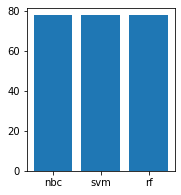

---------------1 : MAKING THE WORLD BRIGHT---------------


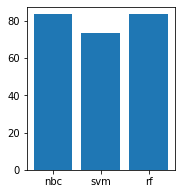

---------------2 : #JanganPercayaFPIMunafik---------------


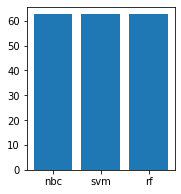

---------------3 : #PeringatanGalonIsiUlangBPA---------------


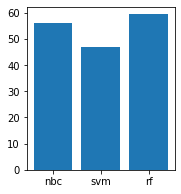

---------------4 : #THEFIRSTSTEP_TREASUREEFFECT---------------


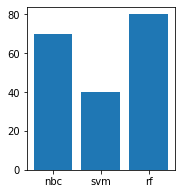

---------------5 : #RisalahAkhirTahun2020---------------


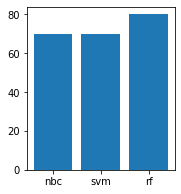

---------------6 : obl hilangkan izin berbelit---------------


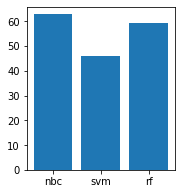

---------------7 : #KhilafahAjaranIslam---------------


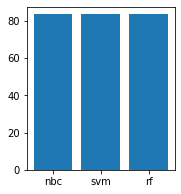

---------------8 : D3to2021 with iKON---------------


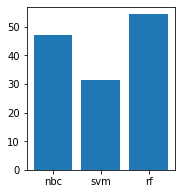

---------------9 : Rewind Indonesia 2020---------------


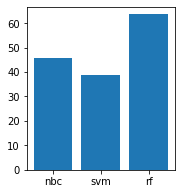

---------------10 : Pak Muh---------------


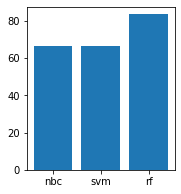

---------------11 : FPI Telah Berakhir---------------


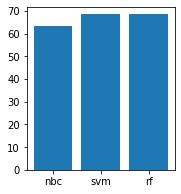

---------------12 : #ByeByeDemocracy---------------


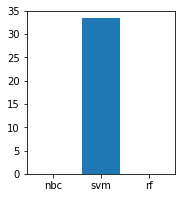

---------------13 : #ENHYPENonASC---------------


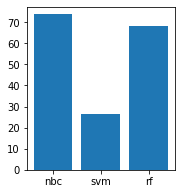

---------------14 : #StopTindakPidana---------------


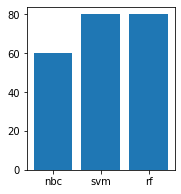

---------------15 : #ENHYPEN ON AFTER SCHOOL CLUB---------------


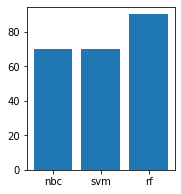

---------------16 : #SpecialDJDoyoung---------------


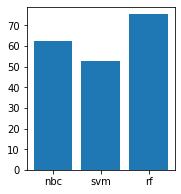

---------------17 : Syafakillah---------------


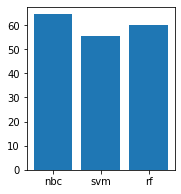

---------------18 : Aa Gym---------------


In [57]:
import matplotlib.pyplot as plt



for i in range (18):
    plt.figure(figsize=(9, 3))
    label_names = str(i + 1)
    names = ["nbc", "svm", "rf"]
    values = [list_akurasi_nbc[i] * 100, list_akurasi_svm[i] * 100, list_akurasi_rf[i] * 100]
    plt.subplot(131)
    plt.bar(names, values)
    plt.show()
    print("---------------" + str(i + 1) + " : " + kata_trending[i] + "---------------")